In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from collections import defaultdict
import argparse
import gzip
import operator
from scipy import stats
import scipy as sp
import community
import datetime

from network_ei import *
from get_motifs import *
from causal_emergence import *

import matplotlib.patches as mpatches
from matplotlib import gridspec
from matplotlib._png import read_png
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

%matplotlib inline

IndentationError: unindent does not match any outer indentation level (causal_emergence.py, line 26)

# Causal Structure as a Network: Quantifying Certainty in Complex Systems

# Chapter 06: Macronodes

In [2]:
def do_net(G, source, target, n_sim=10000, p0=np.exp(-16)):
    """Intervene"""
    if type(G)==np.ndarray:
        G = nx.from_numpy_matrix(G, create_using=nx.DiGraph())
    elif type(G)==nx.classes.graph.Graph:
        G = nx.DiGraph(G)
    
    fpt_list = {}
    Wout = get_Wout_full(G, p0)
    Win = get_Win(G, p0)
    next_node = source
    
    for i in range(n_sim):
        next_node = source
        lisss = [source]
        while next_node != target:
            next_node = np.nonzero(np.random.multinomial(1, np.round(Wout[next_node],2)))[0][0]
            lisss.append(next_node)
        fpt_list[i] = len(lisss)
        
    return list(fpt_list.values())

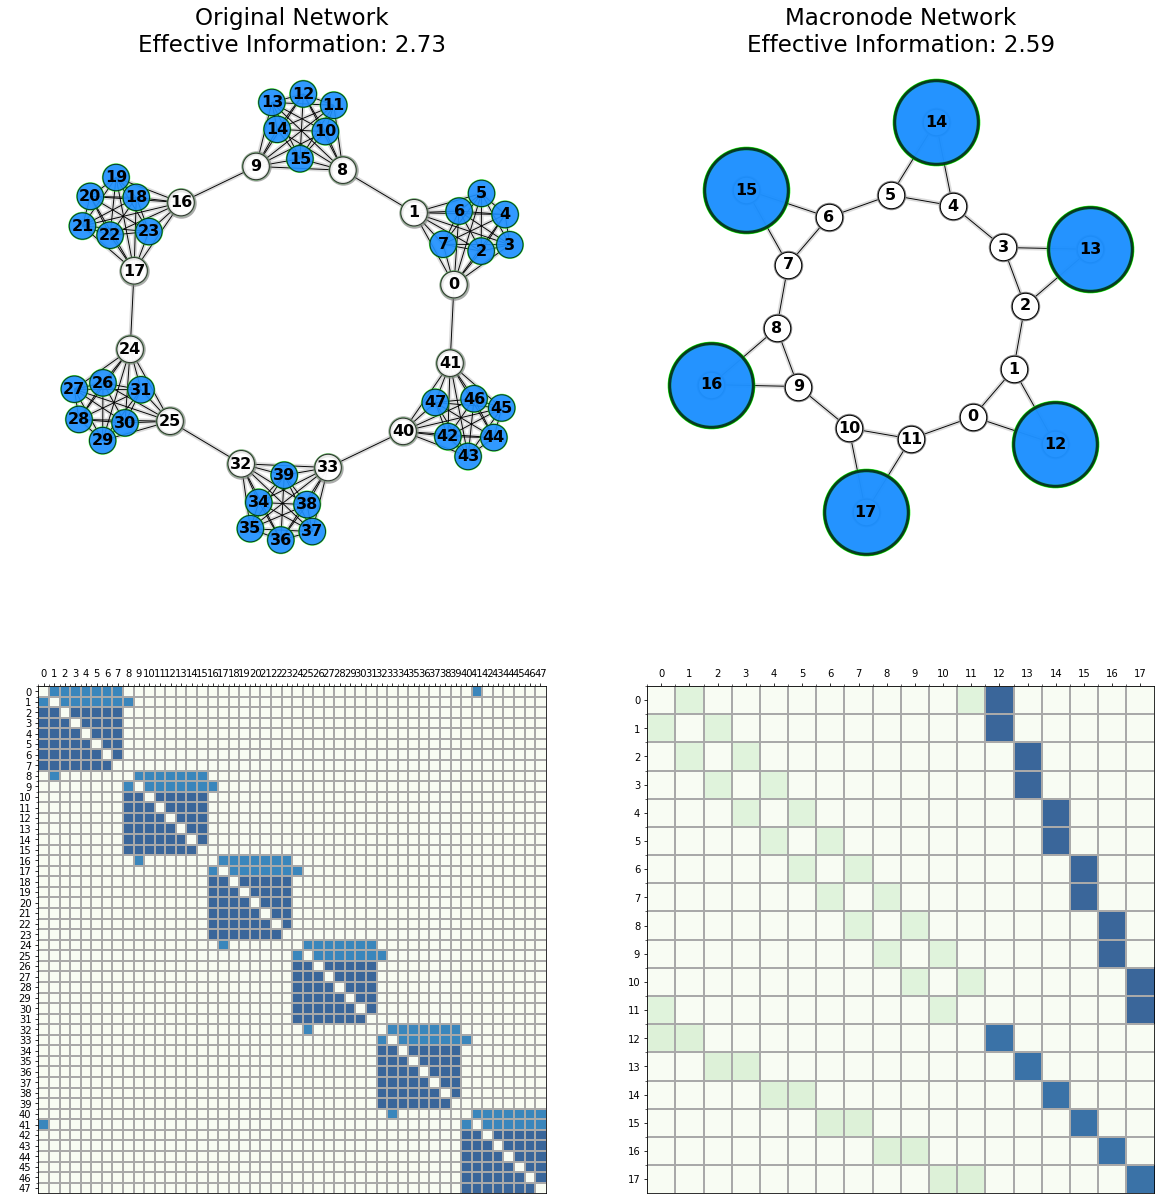

In [415]:
n_cliques = 6
G = nx.ring_of_cliques(n_cliques, 8)
ei_G = get_ei(G)
ns=700
cols = ['white', 'white']
for i in range(2,8):
    cols.append('dodgerblue')    
l = len(cols)
for i in range(5):
    for col in range(l):
        cols.append(cols[col])

Wout0 = get_Wout_full(G)
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(20,21))

pos0 = nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos0, node_color=cols, linewidths=2, 
                       node_size=ns, alpha=0.65, ax=ax0).set_edgecolor('lime')
nx.draw_networkx_nodes(G, pos0, nodelist=[0,1,8,9,16,17,24,25,32,33,40,41], 
                       node_color='white', linewidths=4, node_size=ns, 
                       alpha=0.65, ax=ax0).set_edgecolor('grey')
nx.draw_networkx_nodes(G, pos0, node_color=cols, linewidths=1, 
                       node_size=ns, alpha=0.75, ax=ax0).set_edgecolor('k')
nx.draw_networkx_edges(G, pos0, edge_color="gainsboro", width=4.55, alpha=0.98, ax=ax0)
nx.draw_networkx_edges(G, pos0, edge_color="k", width=0.95, alpha=0.98, ax=ax0)
nx.draw_networkx_labels(G, pos0, font_size=16, font_weight='bold', ax=ax0)
title = "Original Network\nEffective Information: %.2f"%(np.round(ei_G,5))
ax0.set_title(title, size=23)
ax0.axis('off')

nodebunch1=[2,3,4,5,6,7]
Gm = macronode(G, nodebunch=nodebunch1)
nodebunch2=[4,5,6,7,8,9]
Gm = macronode(Gm, nodebunch=nodebunch2)
nodebunch3=[6,7,8,9,10,11]
Gm = macronode(Gm, nodebunch=nodebunch3)
nodebunch4=[8,9,10,11,12,13]
Gm = macronode(Gm, nodebunch=nodebunch4)
nodebunch5=[10,11,12,13,14,15]
Gm = macronode(Gm, nodebunch=nodebunch5)
nodebunch6=[12,13,14,15,16,17]
Gm = macronode(Gm, nodebunch=nodebunch6)
WoutM = get_Wout_full(Gm)
ei_Gm = get_ei(Gm)
pos_m = nx.kamada_kawai_layout(Gm)
Gm = nx.to_undirected(Gm)
nx.draw_networkx_nodes(Gm, pos_m, node_color='white', linewidths=3, 
                       node_size=ns, alpha=0.95, ax=ax1).set_edgecolor('grey')
nx.draw_networkx_nodes(Gm, pos_m, node_color='white', linewidths=1, 
                       node_size=ns, ax=ax1).set_edgecolor('k')
nx.draw_networkx_nodes(Gm, pos_m, node_color='dodgerblue', nodelist=[12,13,14,15,16,17],
                       linewidths=4, node_size=ns*10, alpha=0.9, ax=ax1).set_edgecolor('lime')
nx.draw_networkx_nodes(Gm, pos_m, node_color='dodgerblue', nodelist=[12,13,14,15,16,17],
                       linewidths=3, node_size=ns*10, alpha=0.7, ax=ax1).set_edgecolor('black')
nx.draw_networkx_edges(Gm, pos_m, edge_color="gainsboro", width=4.55, alpha=0.98, ax=ax1)
nx.draw_networkx_edges(Gm, pos_m, edge_color="k", width=0.95, alpha=0.98, ax=ax1)
nx.draw_networkx_labels(Gm, pos_m, font_size=16, font_weight='bold', ax=ax1)
ax1.axis('off')
title = "Macronode Network\nEffective Information: %.2f"%(np.round(ei_Gm,5))
ax1.set_title(title, size=23)

# for i in nodebunch:
#     Wout0[i][nodebunch] = 2/len(nodebunch)

ax2.imshow(Wout0, cmap='GnBu', alpha=0.8)
ax2.set_xticks(np.arange(0, Wout0.shape[0], 1));
ax2.set_yticks(np.arange(0, Wout0.shape[0], 1));
ax2.set_xticklabels(np.arange(0, Wout0.shape[0], 1));
ax2.set_yticklabels(np.arange(0, Wout0.shape[0], 1));
ax2.set_xticks(np.arange(-.5, Wout0.shape[0]-0.5, 1), minor=True);
ax2.set_yticks(np.arange(-.5, Wout0.shape[0]-0.5, 1), minor=True);
ax2.grid(which='minor', color='darkgrey', linestyle='-', linewidth=2)
ax2.xaxis.tick_top()

ax3.imshow(WoutM, cmap='GnBu', alpha=0.8)
ax3.set_xticks(np.arange(0, WoutM.shape[0], 1));
ax3.set_yticks(np.arange(0, WoutM.shape[0], 1));
ax3.set_xticklabels(np.arange(0, WoutM.shape[0], 1));
ax3.set_yticklabels(np.arange(0, WoutM.shape[0], 1));
ax3.set_xticks(np.arange(-.5, WoutM.shape[0]-0.5, 1), minor=True);
ax3.set_yticks(np.arange(-.5, WoutM.shape[0]-0.5, 1), minor=True);
ax3.grid(which='minor', color='darkgrey', linestyle='-', linewidth=2)
ax3.xaxis.tick_top()

plt.savefig("figs/Macronode_RingOfCliques_Matr.png", dpi=425, bbox_inches='tight')
plt.savefig("figs/Macronode_RingOfCliques_Matr.pdf", dpi=425, bbox_inches='tight')
plt.show()

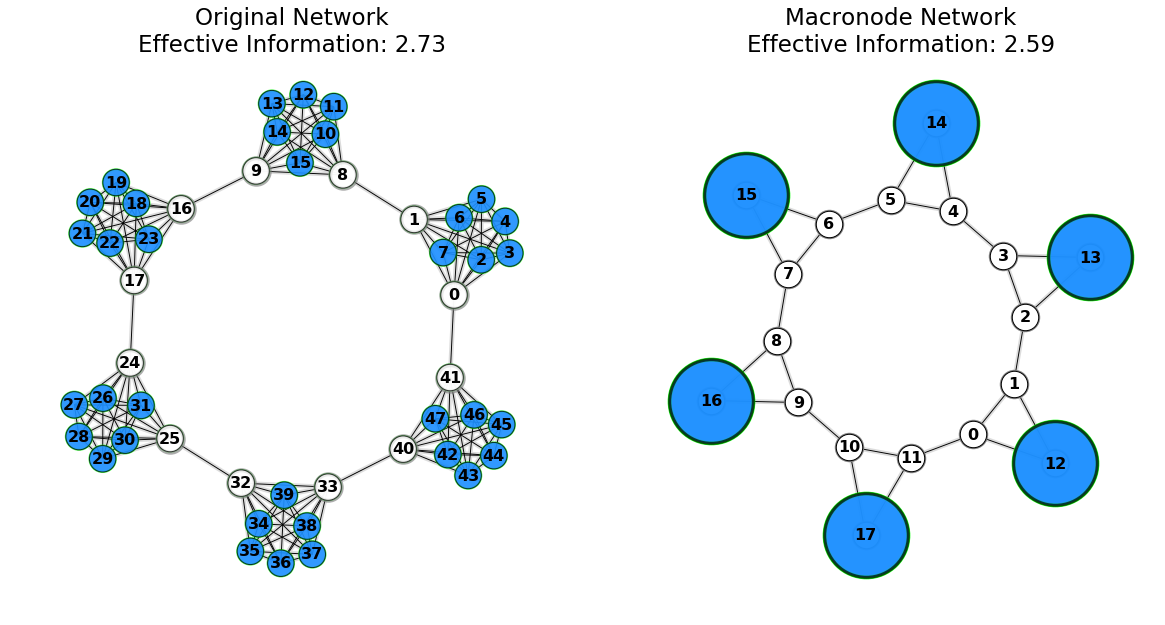

In [359]:
n_cliques = 6
G = nx.ring_of_cliques(n_cliques, 8)
ei_G = get_ei(G)
ns=700
cols = ['white', 'white']
for i in range(2,8):
    cols.append('dodgerblue')    
l = len(cols)
for i in range(5):
    for col in range(l):
        cols.append(cols[col])

# psmall = 0.001
# Wout0 = get_Wout_full(G)
# for i in list(G.nodes()):
#     Wout0[i,i] = psmall

# G = nx.from_numpy_array(Wout0)
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20,10))

pos0 = nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos0, node_color=cols, linewidths=2, 
                       node_size=ns, alpha=0.65, ax=ax0).set_edgecolor('lime')
nx.draw_networkx_nodes(G, pos0, nodelist=[0,1,8,9,16,17,24,25,32,33,40,41], 
                       node_color='white', linewidths=4, node_size=ns, 
                       alpha=0.65, ax=ax0).set_edgecolor('grey')
nx.draw_networkx_nodes(G, pos0, node_color=cols, linewidths=1, 
                       node_size=ns, alpha=0.75, ax=ax0).set_edgecolor('k')
nx.draw_networkx_edges(G, pos0, edge_color="gainsboro", width=4.55, alpha=0.98, ax=ax0)
nx.draw_networkx_edges(G, pos0, edge_color="k", width=0.95, alpha=0.98, ax=ax0)
nx.draw_networkx_labels(G, pos0, font_size=16, font_weight='bold', ax=ax0)
title = "Original Network\nEffective Information: %.2f"%(np.round(ei_G,5))
ax0.set_title(title, size=23)
ax0.axis('off')

nodebunch1=[2,3,4,5,6,7]
Gm = macronode(G, nodebunch=nodebunch1)
nodebunch2=[4,5,6,7,8,9]
Gm = macronode(Gm, nodebunch=nodebunch2)
nodebunch3=[6,7,8,9,10,11]
Gm = macronode(Gm, nodebunch=nodebunch3)
nodebunch4=[8,9,10,11,12,13]
Gm = macronode(Gm, nodebunch=nodebunch4)
nodebunch5=[10,11,12,13,14,15]
Gm = macronode(Gm, nodebunch=nodebunch5)
nodebunch6=[12,13,14,15,16,17]
Gm = macronode(Gm, nodebunch=nodebunch6)
WoutM = get_Wout_full(Gm)
ei_Gm = get_ei(Gm)
pos_m = nx.kamada_kawai_layout(Gm)
Gm = nx.to_undirected(Gm)
nx.draw_networkx_nodes(Gm, pos_m, node_color='white', linewidths=3, 
                       node_size=ns, alpha=0.95, ax=ax1).set_edgecolor('grey')
nx.draw_networkx_nodes(Gm, pos_m, node_color='white', linewidths=1, 
                       node_size=ns, ax=ax1).set_edgecolor('k')
nx.draw_networkx_nodes(Gm, pos_m, node_color='dodgerblue', nodelist=[12,13,14,15,16,17],
                       linewidths=4, node_size=ns*10, alpha=0.9, ax=ax1).set_edgecolor('lime')
nx.draw_networkx_nodes(Gm, pos_m, node_color='dodgerblue', nodelist=[12,13,14,15,16,17],
                       linewidths=3, node_size=ns*10, alpha=0.7, ax=ax1).set_edgecolor('black')
nx.draw_networkx_edges(Gm, pos_m, edge_color="gainsboro", width=4.55, alpha=0.98, ax=ax1)
nx.draw_networkx_edges(Gm, pos_m, edge_color="k", width=0.95, alpha=0.98, ax=ax1)
nx.draw_networkx_labels(Gm, pos_m, font_size=16, font_weight='bold', ax=ax1)
ax1.axis('off')
title = "Macronode Network\nEffective Information: %.2f"%(np.round(ei_Gm,5))
ax1.set_title(title, size=23)

# plt.savefig("figs/Macronode_RingOfCliques_Matr.png", dpi=425, bbox_inches='tight')
# plt.savefig("figs/Macronode_RingOfCliques_Matr.pdf", dpi=425, bbox_inches='tight')
plt.show()

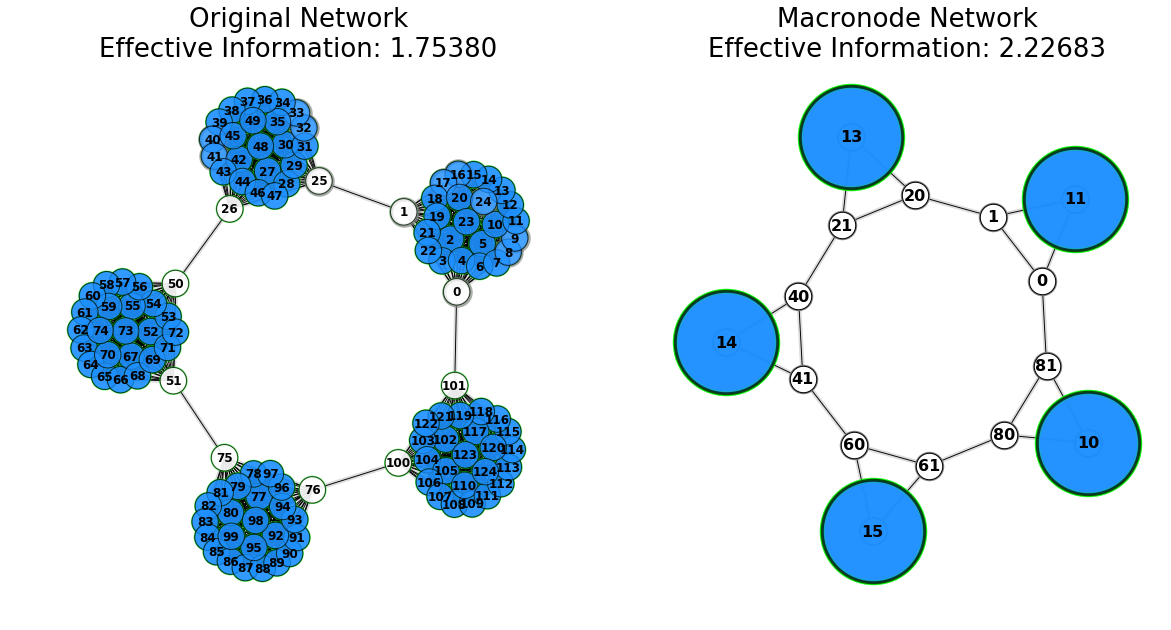

In [371]:
n_cliques = 5
n_inside = 25
G = nx.ring_of_cliques(n_cliques, n_inside)
ns = 700
cols = ['white', 'white']
for i in range(2,n_inside):
    cols.append('dodgerblue')    
l = len(cols)
for i in range(n_cliques-1):
    for col in range(l):
        cols.append(cols[col])

p0 = 0.001
Wout0 = get_Wout_full(G, p0)
ei_G0 = get_ei(Wout0, p0)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20,10))

pos0 = nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos0, node_color=cols, linewidths=2, 
                       node_size=ns, alpha=0.65, ax=ax0).set_edgecolor('lime')
nx.draw_networkx_nodes(G, pos0, nodelist=[0,1,8,9,16,17,24,25,32,33,40,41], 
                       node_color='white', linewidths=4, node_size=ns, 
                       alpha=0.65, ax=ax0).set_edgecolor('grey')
nx.draw_networkx_nodes(G, pos0, node_color=cols, linewidths=1, 
                       node_size=ns, alpha=0.75, ax=ax0).set_edgecolor('k')
nx.draw_networkx_edges(G, pos0, edge_color="gainsboro", width=4.55, alpha=0.98, ax=ax0)
nx.draw_networkx_edges(G, pos0, edge_color="k", width=0.95, alpha=0.98, ax=ax0)
nx.draw_networkx_labels(G, pos0, font_size=12, font_weight='bold', ax=ax0)
title = "Original Network\nEffective Information: %.5f"%(np.round(ei_G0 ,5))
ax0.set_title(title, size=26)
ax0.axis('off')

nodebunch = list(range(n_inside-2))
nodebunch = [node+2 for node in nodebunch]
Gm = macronode(G, nodebunch=nodebunch)
for i in range(n_cliques-2):
    nodebunch = [node+2 for node in nodebunch]
    Gm = macronode(Gm, nodebunch=nodebunch)
    
nodebunch = [node+2 for node in nodebunch]
Gm = macronode(Gm, nodebunch=nodebunch)
WoutM = get_Wout_full(Gm, p0)
ei_Gm = get_ei(WoutM, p0)

pos_m = nx.kamada_kawai_layout(Gm)
Gm = nx.to_undirected(Gm)
nx.draw_networkx_nodes(Gm, pos_m, node_color='white', linewidths=3, 
                       node_size=ns, alpha=0.95, ax=ax1).set_edgecolor('grey')
nx.draw_networkx_nodes(Gm, pos_m, node_color='white', linewidths=1, 
                       node_size=ns, ax=ax1).set_edgecolor('k')
nx.draw_networkx_nodes(Gm, pos_m, node_color='dodgerblue', nodelist=list(range(2*n_cliques, 3*n_cliques)),
                       linewidths=5, node_size=ns*15, alpha=0.9, ax=ax1).set_edgecolor('lime')
nx.draw_networkx_nodes(Gm, pos_m, node_color='dodgerblue', nodelist=list(range(2*n_cliques, 3*n_cliques)),
                       linewidths=3, node_size=ns*15, alpha=0.7, ax=ax1).set_edgecolor('black')
nx.draw_networkx_edges(Gm, pos_m, edge_color="gainsboro", width=4.55, alpha=0.98, ax=ax1)
nx.draw_networkx_edges(Gm, pos_m, edge_color="k", width=0.95, alpha=0.98, ax=ax1, arrowsize=10)
labs = dict(zip(list(Gm.nodes()),[80,81,0,1,20,21,40,41,60,61,10,11,13,14,15]))
nx.draw_networkx_labels(Gm, pos_m, labels=labs, font_size=16, font_weight='bold', ax=ax1)
ax1.axis('off')
title = "Macronode Network\nEffective Information: %.5f"%(np.round(ei_Gm, 5))
ax1.set_title(title, size=26)

# plt.savefig("figs/Macronode_RingOfCliques_withnoise.png", dpi=425, bbox_inches='tight')
# plt.savefig("figs/Macronode_RingOfCliques_withnoise.pdf", dpi=425, bbox_inches='tight')
plt.show()

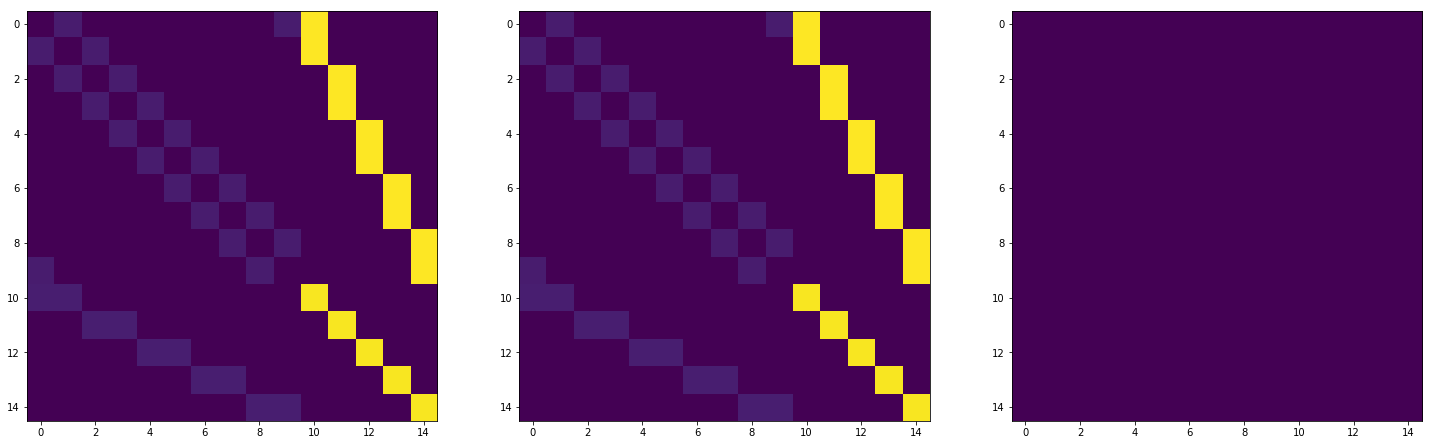

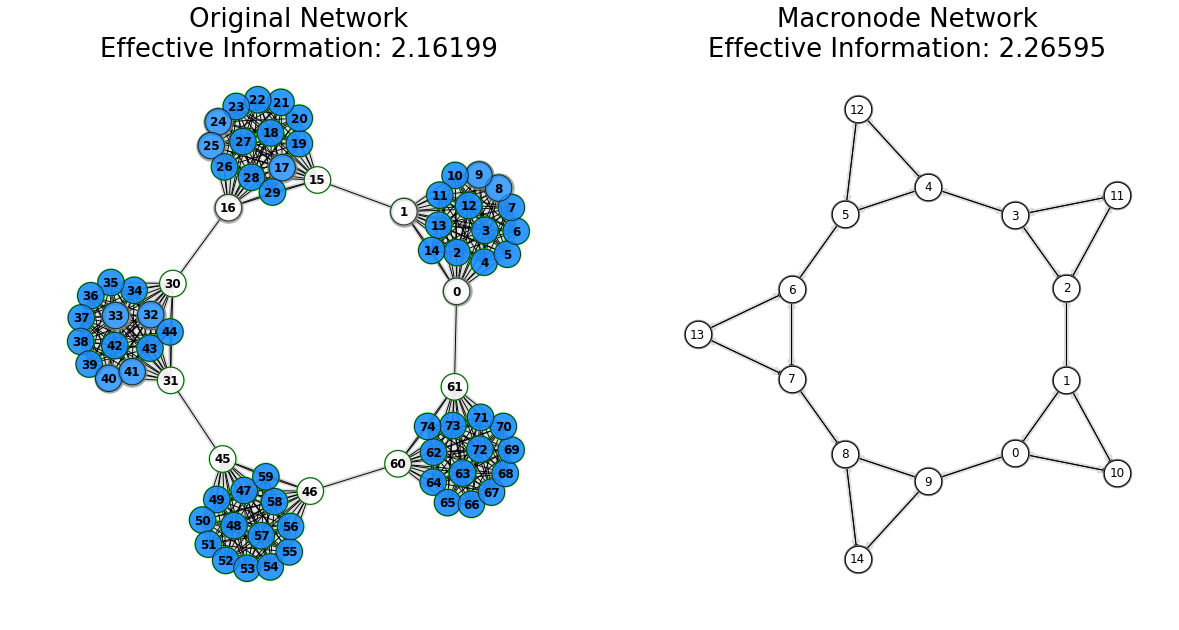

In [323]:
n_cliques = 5
n_inside = 15
G = nx.ring_of_cliques(n_cliques, n_inside)
cols = ['white', 'white']
for i in range(2,n_inside):
    cols.append('dodgerblue')    
l = len(cols)
for i in range(n_cliques-1):
    for col in range(l):
        cols.append(cols[col])


nodebunch = list(range(n_inside-2))
nodebunch1 = [node+2 for node in nodebunch]
Gm = macronode(G, nodebunch=nodebunch1)

nodebunch2 = [node+2 for node in nodebunch1]
Gm = macronode(Gm, nodebunch=nodebunch2)

nodebunch3 = [node+2 for node in nodebunch2]
Gm = macronode(Gm, nodebunch=nodebunch3)

nodebunch4 = [node+2 for node in nodebunch3]
Gm = macronode(Gm, nodebunch=nodebunch4)

nodebunch5 = [node+2 for node in nodebunch4]
Gm = macronode(Gm, nodebunch=nodebunch5)

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(25,8))
ax0.imshow(nx.to_numpy_array(Gm))
ax1.imshow(get_Wout(Gm, p0=0))
ax2.imshow(np.round(nx.to_numpy_array(Gm), 5) - np.round(get_Wout(Gm, p0=0), 5))
plt.show()

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20,10))

p0 = 0.001
ei_G = get_ei(G, p0)
pos0 = nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos0, node_color=cols, linewidths=2, 
                       node_size=ns, alpha=0.65, ax=ax0).set_edgecolor('lime')
nx.draw_networkx_nodes(G, pos0, nodelist=[0,1,8,9,16,17,24,25,32,33,40,41], 
                       node_color='white', linewidths=4, node_size=ns, 
                       alpha=0.65, ax=ax0).set_edgecolor('grey')
nx.draw_networkx_nodes(G, pos0, node_color=cols, linewidths=1, 
                       node_size=ns, alpha=0.75, ax=ax0).set_edgecolor('k')
nx.draw_networkx_edges(G, pos0, edge_color="gainsboro", width=4.55, alpha=0.98, ax=ax0)
nx.draw_networkx_edges(G, pos0, edge_color="k", width=0.95, alpha=0.98, ax=ax0)
nx.draw_networkx_labels(G, pos0, font_size=12, font_weight='bold', ax=ax0)
title = "Original Network\nEffective Information: %.5f"%(np.round(ei_G,5))
ax0.set_title(title, size=26)
ax0.axis('off')

ei_Gm = get_ei(Gm, p0)
pos_m = nx.kamada_kawai_layout(Gm)
nx.draw_networkx_nodes(Gm, pos_m, node_color='white', linewidths=3, 
                       node_size=ns, alpha=0.95, ax=ax1).set_edgecolor('grey')
nx.draw_networkx_nodes(Gm, pos_m, node_color='white', linewidths=1, 
                       node_size=ns, ax=ax1).set_edgecolor('k')
nx.draw_networkx_edges(Gm, pos_m, edge_color="gainsboro", width=4.55, alpha=0.98, ax=ax1)
nx.draw_networkx_edges(Gm, pos_m, edge_color="k", width=0.95, alpha=0.98, ax=ax1, arrowsize=10)
nx.draw_networkx_labels(Gm, pos_m)
ax1.axis('off')
title = "Macronode Network\nEffective Information: %.5f"%(np.round(ei_Gm,5))
ax1.set_title(title, size=26)

plt.show()

In [408]:
d_away = 1
nodepairs_d2 = get_paths(G, d=d_away)

print("In G, the density is:", np.round(nx.density(G), 5))
print()
print("In G, there are", len(nodepairs_d2), "pairs of nodes at d =",d_away,"from one another.")
print()
# Let's try to macronode nodes in these networks 100 times.
n_steps = 70
n_edges_sampled = 400
G_macro = G.copy()

nx.convert_node_labels_to_integers(G_macro)

print("G starts with N =", G_macro.number_of_nodes(), 
      "nodes and EI =", np.round(get_ei(G_macro, p0=0.0),5))

In G, the density is: 0.19419

In G, there are 3010 pairs of nodes at d = 1 from one another.

G starts with N = 125 nodes and EI = 2.37602


In [ ]:
macronodes = {}
d_away = 1

print("Starting to span the possible groupings at:", datetime.datetime.now())
for i in range(n_steps):    
    index_to_check = np.random.choice(range(len(nodepairs_d2)), size=n_edges_sampled)
    edges_to_check = np.array(nodepairs_d2)[index_to_check]
    edges_to_check = [tuple(edges_to_check[i]) for i in range(len(edges_to_check))]
    
    ei_diff_dict, success_edges = get_ei_diff(G_macro, edges_to_check)
    
    if success_edges: 
        macro_edges = sorted(ei_diff_dict.items(), key=operator.itemgetter(1), reverse=True)#[0][0]
        for eij in macro_edges:
            if eij[0] not in list(macronodes.keys()):
                macronodes[eij[0]] = ei_diff_dict[eij[0]]
                
    print("Finished with iteration %02i at:"%i, datetime.datetime.now())

In [410]:
G_macro = G.copy()
for i in range(n_steps):
    nodepairs_d2 = get_paths(G_macro, d=d_away)
    
    index_to_check = np.random.choice(range(len(nodepairs_d2)), size=n_edges_sampled)
    edges_to_check = np.array(nodepairs_d2)[index_to_check]
    edges_to_check = [tuple(edges_to_check[i]) for i in range(len(edges_to_check))]
    
    ei_diff_dict, success_edges = get_ei_diff(G_macro, edges_to_check)
    
    if success_edges: 
        macro_edges = sorted(ei_diff_dict.items(), key=operator.itemgetter(1))#[0][0]
        nodebunch = [macro_edges[0][0][0], macro_edges[0][0][1]]
        G_macro = macronode(G_macro, nodebunch=nodebunch)
        
    print("Finished with iteration %02i at:"%i, datetime.datetime.now())

Finished with iteration 00 at: 2018-09-18 10:47:50.508560
Finished with iteration 01 at: 2018-09-18 10:48:02.425799
Finished with iteration 02 at: 2018-09-18 10:48:13.813041
Finished with iteration 03 at: 2018-09-18 10:48:25.448262
Finished with iteration 04 at: 2018-09-18 10:48:36.889829
Finished with iteration 05 at: 2018-09-18 10:48:47.998462
Finished with iteration 06 at: 2018-09-18 10:48:59.312396
Finished with iteration 07 at: 2018-09-18 10:49:10.267498
Finished with iteration 08 at: 2018-09-18 10:49:21.504988
Finished with iteration 09 at: 2018-09-18 10:49:31.805560
Finished with iteration 10 at: 2018-09-18 10:49:42.185097
Finished with iteration 11 at: 2018-09-18 10:49:52.786141
Finished with iteration 12 at: 2018-09-18 10:50:02.900159
Finished with iteration 13 at: 2018-09-18 10:50:12.689737
Finished with iteration 14 at: 2018-09-18 10:50:22.530311
Finished with iteration 15 at: 2018-09-18 10:50:31.996076
Finished with iteration 16 at: 2018-09-18 10:50:41.590497
Finished with 

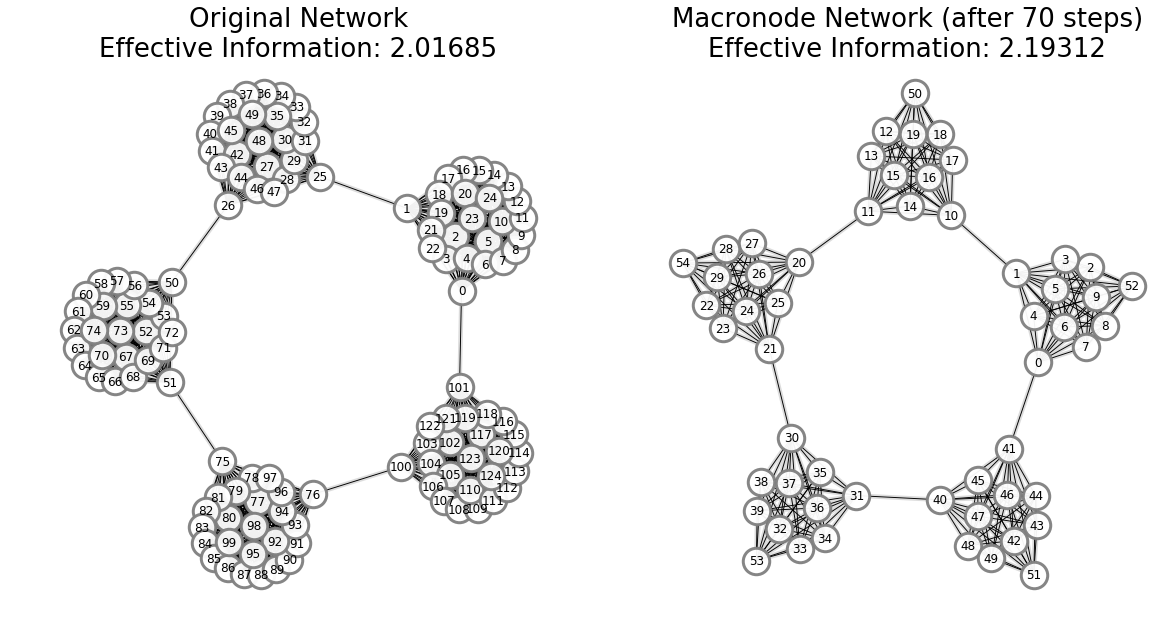

In [414]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20,10))

p0 = 0.001
ei_G = get_ei(G, p0)
pos0 = nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos0, node_color='white', linewidths=3, 
                       node_size=ns, alpha=0.95, ax=ax0).set_edgecolor('grey')
nx.draw_networkx_edges(G, pos0, edge_color="gainsboro", width=4.55, alpha=0.98, ax=ax0)
nx.draw_networkx_edges(G, pos0, edge_color="k", width=0.95, alpha=0.98, ax=ax0)
nx.draw_networkx_labels(G, pos0, ax=ax0)#, font_size=12, font_weight='bold', ax=ax0)
title = "Original Network\nEffective Information: %.5f"%(np.round(ei_G,5))
ax0.set_title(title, size=26)
ax0.axis('off')

ei_Gm = get_ei(G_macro, p0)
pos_m = nx.kamada_kawai_layout(G_macro)
G_macro = nx.to_undirected(G_macro)
nx.draw_networkx_nodes(G_macro, pos_m, node_color='white', linewidths=3, 
                       node_size=ns, alpha=0.95, ax=ax1).set_edgecolor('grey')
nx.draw_networkx_edges(G_macro, pos_m, edge_color="gainsboro", width=4.55, alpha=0.98, ax=ax1)
nx.draw_networkx_edges(G_macro, pos_m, edge_color="k", width=0.95, alpha=0.98, ax=ax1)
nx.draw_networkx_labels(G_macro, pos_m, ax=ax1)
ax1.axis('off')
title = "Macronode Network (after 70 steps)\nEffective Information: %.5f"%(np.round(ei_Gm,5))
ax1.set_title(title, size=26)

plt.savefig("figs/pdfs/EffectiveInformation_Macro_Cliques_example.pdf", dpi=425, bbox_inches='tight')
plt.savefig("figs/pngs/EffectiveInformation_Macro_Cliques_example.png", dpi=425, bbox_inches='tight')
plt.show()

______________________

In [879]:
macro_dict

{}

In [887]:
N = 10
probs = np.random.uniform(0,1,N)
probs = probs/sum(probs)
G = nx.barabasi_albert_graph(N,2)
current_mapping = dict(zip(list(range(N)), [[i] for i in range(N)]))
current_mapping[N-1] = [N-2]
# current_mapping = dict(zip(list(range(N)), np.random.choice(list(range(N)), N, p=probs)))
macro_dict = {}
for i in current_mapping.keys():
    macro = current_mapping[i]
    if type(macro)==list:
        for m in macro:
            if m not in macro_dict.keys():
                macro_dict[m] = [i]
            else:
                macro_dict[m].append(i)
    else:
        if macro not in macro_dict.keys():
            macro_dict[macro] = [i]
        else:
            macro_dict[macro].append(i)
        
macro_size = len(macro_dict)

G = check_network(G)
A = nx.to_numpy_array(G)
W_out_micro = get_Wout_full(G, p0)
micro_size = len(W_out_micro)
W_out_macro = np.zeros((micro_size,micro_size))

for row in macro_dict.keys():
    W_out_macro[macro_dict[row]] = np.mean(W_out_micro[macro_dict[row]], axis=0)
    # now is a macro x micro size matrix
macro_dict_keys = list(macro_dict.keys())
W_out = np.zeros((macro_size,macro_size))
for row in range(len(macro_dict.keys())):
    join_yes = macro_dict[macro_dict_keys[row]]
    join_not = list(set(list(current_mapping.keys())) - set(join_yes))
    sliced = W_out_macro[join_yes][0]
    for i in range(len(W_out[0])):
        if i in join_not:
            W_out[row][i] = sliced[i]
        else:
            W_out[row][i] = W_out[row][i] + sliced[i]
            
ordering = []
for i in macro_dict.keys():
    for j in macro_dict[i]:
        ordering.append(j)
test = np.zeros(W_out_micro.shape)
for i in range(test.shape[0]):
    test[i]=W_out_micro[i][ordering]

Alert: im gonna add some edgeweights to G


{0: [0], 1: [1], 2: [2], 3: [3], 4: [4], 5: [5], 6: [6], 7: [7], 8: [8, 9]} 0


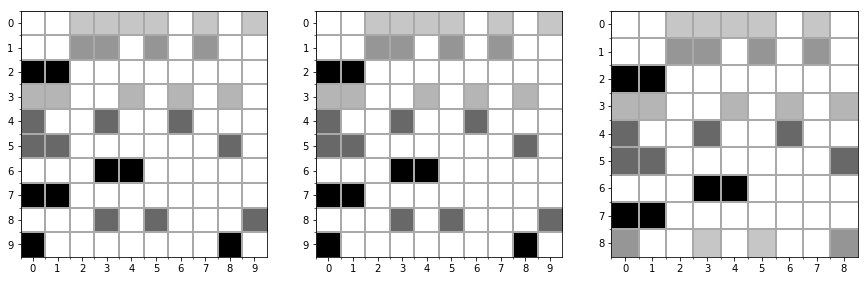

1.4743456773138992
1.4743456773138992
1.2837313259870875


In [888]:
row=0
print(macro_dict, row)
h = 5
sp = 3

ei1 = get_ei(test, p0=0)
ei2 = get_ei(W_out_micro, p0=0)
ei3 = get_ei(W_out, p0=0)
if ei3 > ei1 and ei3 > ei2:
    
    fig, (ax1, ax2, ax3) = plt.subplots(1,sp,figsize=(h*sp,h))
    ax1.imshow(W_out_micro, cmap='Greys')
    ax1.set_xticks(np.arange(0, W_out_micro.shape[0], 1));
    ax1.set_yticks(np.arange(0, W_out_micro.shape[0], 1));
    ax1.set_xticklabels(np.arange(0, W_out_micro.shape[0], 1));
    ax1.set_yticklabels(np.arange(0, W_out_micro.shape[0], 1));
    ax1.set_xticks(np.arange(-.5, W_out_micro.shape[0]-0.5, 1), minor=True);
    ax1.set_yticks(np.arange(-.5, W_out_micro.shape[0]-0.5, 1), minor=True);
    ax1.grid(which='minor', color='darkgrey', linestyle='-', linewidth=2)

    ax2.imshow(test, cmap='Greys')
    ax2.set_xticks(np.arange(0, test.shape[0], 1));
    ax2.set_yticks(np.arange(0, test.shape[0], 1));
    ax2.set_xticklabels(ordering);
    ax2.set_yticklabels(ordering);
    ax2.set_xticks(np.arange(-.5, test.shape[0]-0.5, 1), minor=True);
    ax2.set_yticks(np.arange(-.5, test.shape[0]-0.5, 1), minor=True);
    ax2.grid(which='minor', color='darkgrey', linestyle='-', linewidth=2)

    ax3.imshow(W_out, cmap='Greys')
    ax3.set_xticks(np.arange(0, W_out.shape[0], 1));
    ax3.set_yticks(np.arange(0, W_out.shape[0], 1));
    ax3.set_xticklabels(list(macro_dict.keys()));
    ax3.set_yticklabels(list(macro_dict.keys()));
    ax3.set_xticks(np.arange(-.5, W_out.shape[0]-0.5, 1), minor=True);
    ax3.set_yticks(np.arange(-.5, W_out.shape[0]-0.5, 1), minor=True);
    ax3.grid(which='minor', color='darkgrey', linestyle='-', linewidth=2)

    plt.show()

In [909]:
W_out_macro[join_yes][0]

array([9.36038267e-04, 7.68897258e-04, 3.26580275e-04, 4.95243842e-01,
       2.08272444e-04, 3.17213518e-04, 1.11314840e-04, 4.95336746e-01,
       5.77234446e-04, 9.81273199e-04, 5.08138545e-04, 4.18032116e-04,
       6.15347877e-04, 6.49925041e-04, 4.54833473e-05, 6.52334163e-04,
       2.96435459e-04, 8.24420968e-04, 8.94594183e-04, 2.87875847e-04])

In [915]:
np.round(W_out_macro[join_yes][0],2)

array([0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. ])

In [939]:
join_yes

[0, 1, 2, 3, 4, 5]

In [933]:
        join_yes = macro_dict[macro_dict_keys[row]]
        join_not = list(set(list(current_mapping.keys())) - set(join_yes))


In [942]:
W_out_macro[join_not][0]

array([7.32499575e-05, 3.45625281e-04, 3.44025356e-05, 4.97353059e-01,
       6.41117254e-04, 4.96552013e-01, 1.52490173e-04, 3.18488209e-04,
       1.65471776e-04, 1.52632122e-04, 5.04262912e-04, 2.71528739e-04,
       9.24220412e-04, 9.53205913e-04, 1.97403166e-04, 7.61455730e-04,
       4.35330565e-05, 7.68138387e-05, 3.38365287e-04, 1.40661377e-04])

In [946]:
W_out_macro[join_not][row]

array([7.32499575e-05, 3.45625281e-04, 3.44025356e-05, 4.97353059e-01,
       6.41117254e-04, 4.96552013e-01, 1.52490173e-04, 3.18488209e-04,
       1.65471776e-04, 1.52632122e-04, 5.04262912e-04, 2.71528739e-04,
       9.24220412e-04, 9.53205913e-04, 1.97403166e-04, 7.61455730e-04,
       4.35330565e-05, 7.68138387e-05, 3.38365287e-04, 1.40661377e-04])

In [947]:
macro_dict

{0: [0, 1, 2, 3, 4, 5],
 6: [6],
 7: [7],
 8: [8],
 9: [9],
 10: [10],
 11: [11],
 12: [12],
 13: [13],
 14: [14],
 15: [15],
 16: [16],
 17: [17],
 18: [18],
 19: [19]}

array([6.71313199e-04, 1.24058771e-04, 1.41747131e-01, 1.41570009e-01,
       4.93041224e-04, 7.85072898e-04, 7.40491830e-04, 1.42099625e-01,
       1.41938719e-01, 6.74675762e-05, 1.83624704e-04, 4.08468046e-04,
       1.42352378e-01, 5.27748402e-04, 1.42106575e-01, 7.59441030e-04,
       4.53394601e-04, 2.15334373e-04, 8.99677843e-04, 1.41856428e-01])

In [959]:
W_out_macro[join_not]

array([[4.81487156e-04, 1.97013253e-04, 4.95356391e-01, 9.62641444e-04,
        7.67635832e-04, 5.44850553e-05, 4.95217607e-01, 8.64152206e-04,
        8.56821231e-04, 3.59415621e-04, 4.93308712e-04, 3.93214096e-05,
        4.14269879e-04, 2.62058619e-04, 2.64266594e-04, 4.18768356e-04,
        4.79358433e-04, 8.97109250e-04, 6.84089142e-04, 9.29799601e-04],
       [9.08051722e-02, 9.02400030e-02, 7.01456210e-04, 9.02300119e-02,
        9.03651996e-02, 9.00462997e-02, 9.07261335e-02, 4.26686257e-04,
        9.06679550e-02, 3.69033636e-04, 6.83093296e-04, 9.01434376e-02,
        9.52610968e-04, 7.53770935e-04, 9.04366818e-02, 9.08225520e-02,
        3.72082041e-05, 9.08025444e-02, 3.24056573e-04, 4.66093209e-04],
       [1.41796714e-01, 2.97218796e-04, 1.41571484e-01, 9.86932584e-04,
        1.41118923e-01, 1.41897470e-01, 6.02854542e-04, 8.85218712e-04,
        7.52583171e-04, 1.41172883e-01, 1.42004811e-01, 9.44376421e-04,
        9.19790810e-04, 6.95868180e-04, 8.96060992e-04, 6.5972

0.02755117798397899


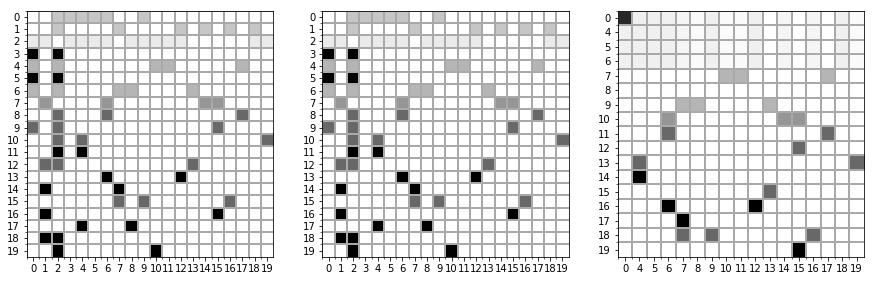

0.1689928959862379


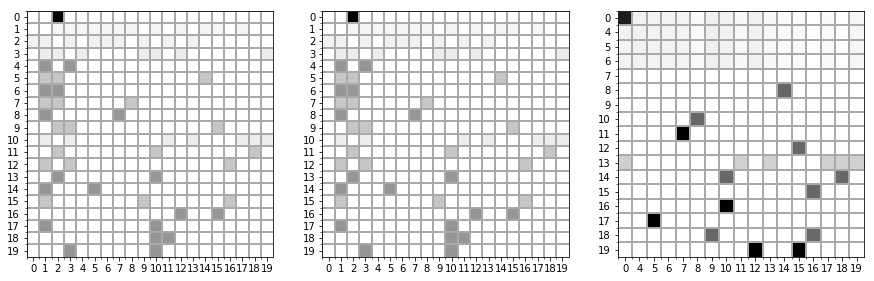

0.02111337739457042


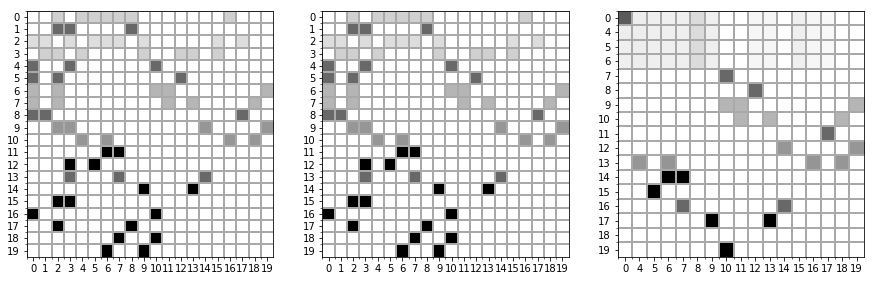

0.08754580389884392


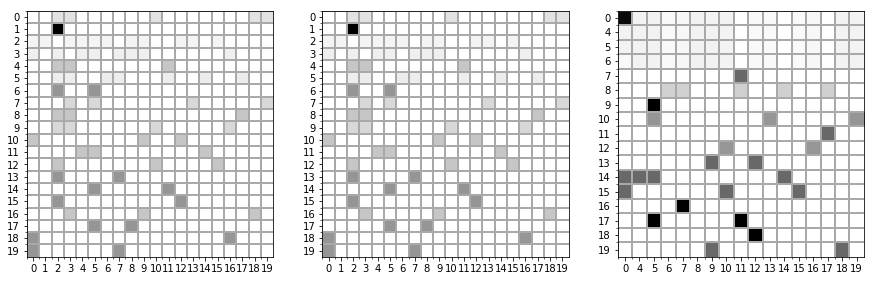

0.20339869308942538


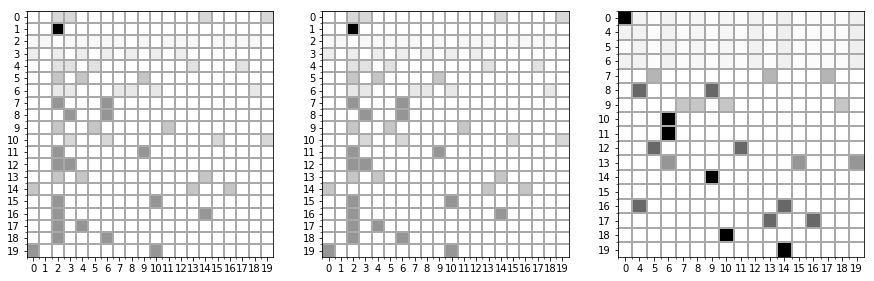

0.058596396992617095


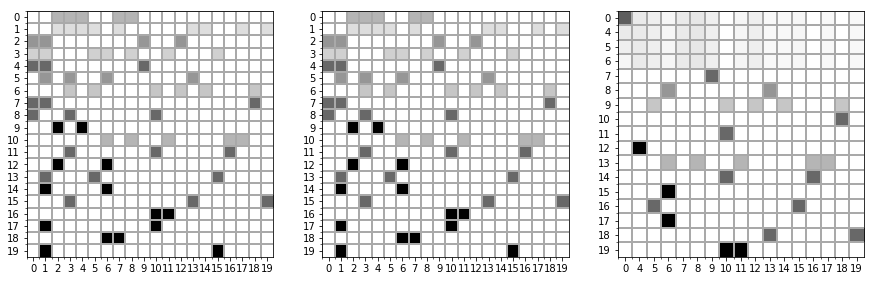

0.05235332379260482


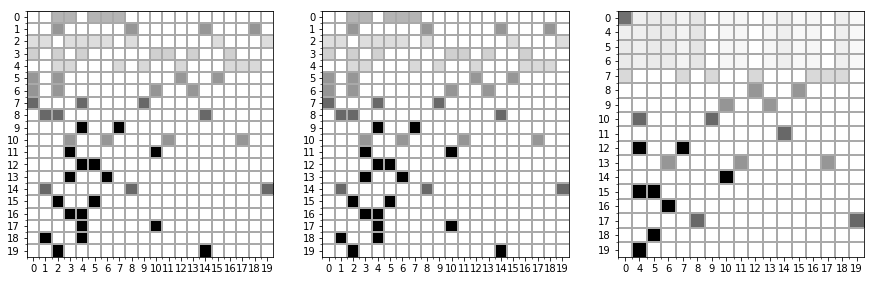

0.015391517394845344


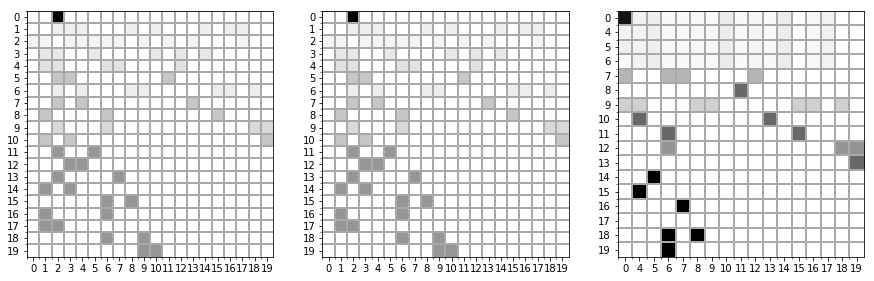

0.12589321367931205


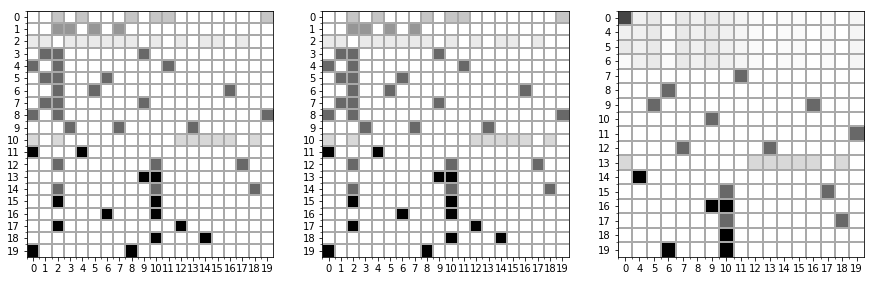

0.052436247122277235


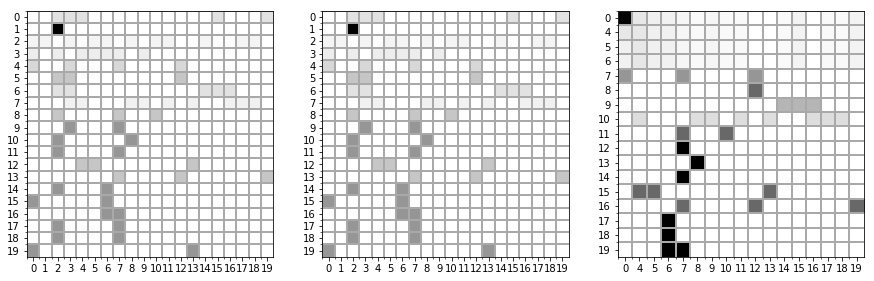

0.09985634115153674


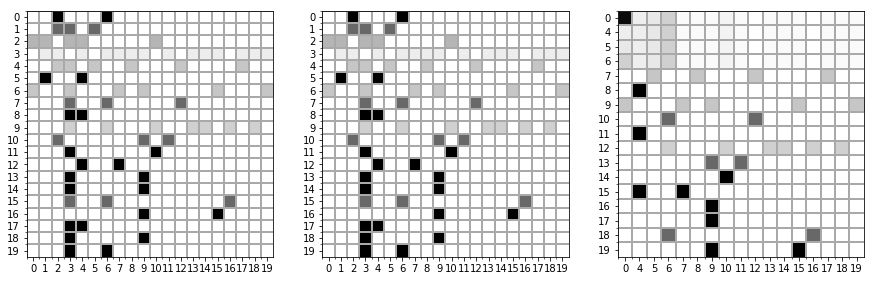

0.03369227507829775


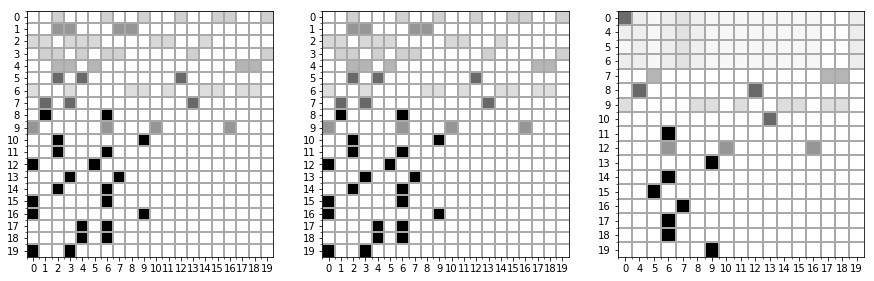

0.03598980802258733


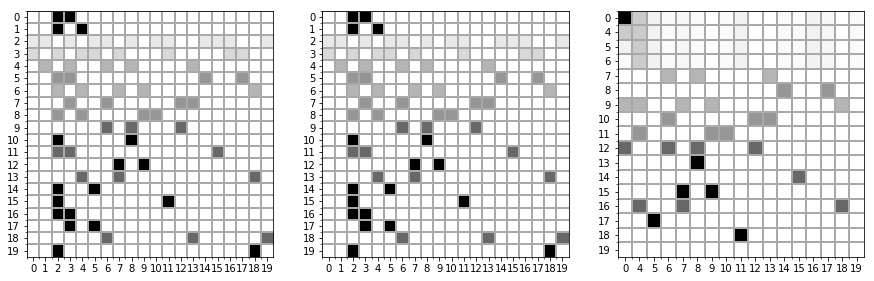

0.2061032096000024


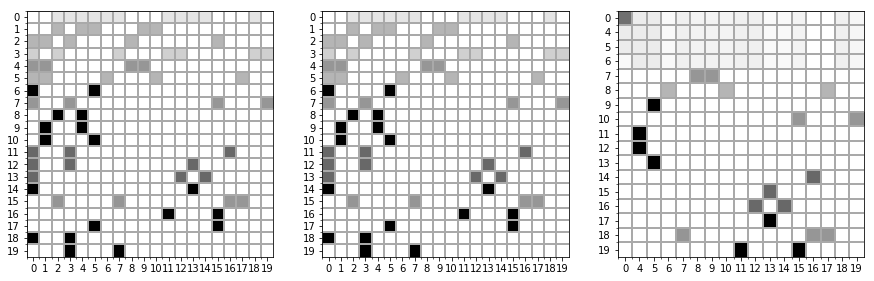

0.0863115843362432


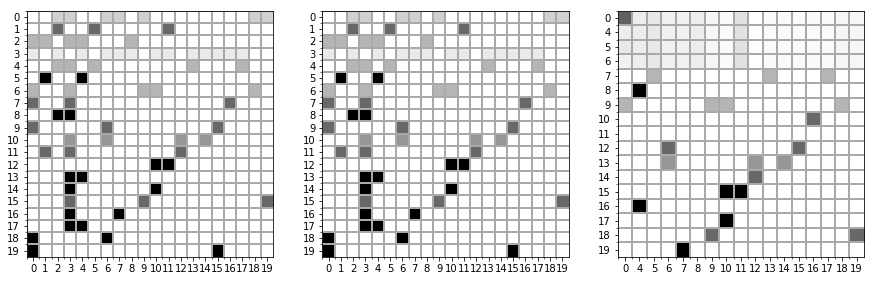

0.07892923695809939


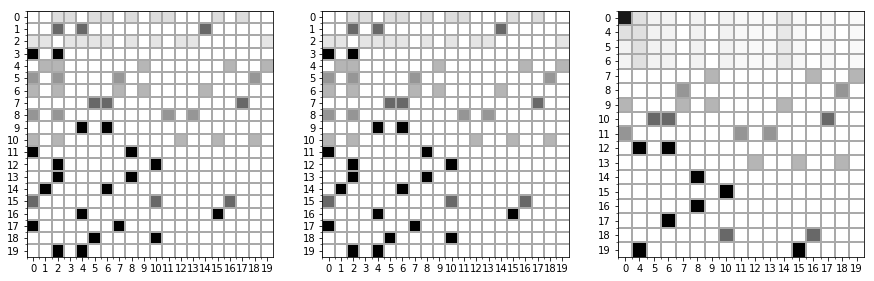

0.2263511428321474


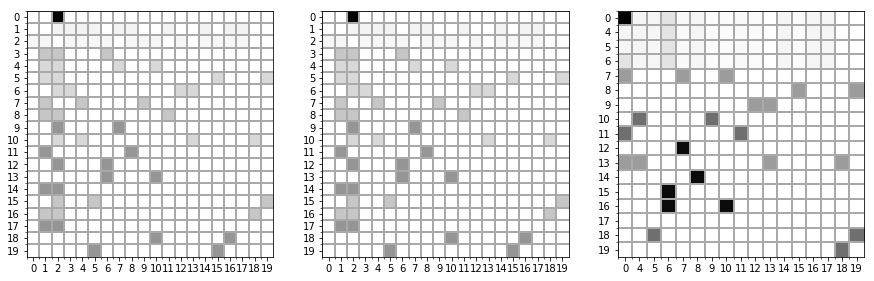

0.0588265937914616


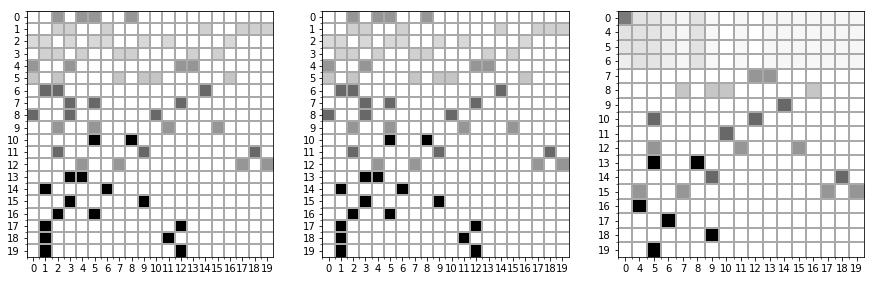

0.2501073928599209


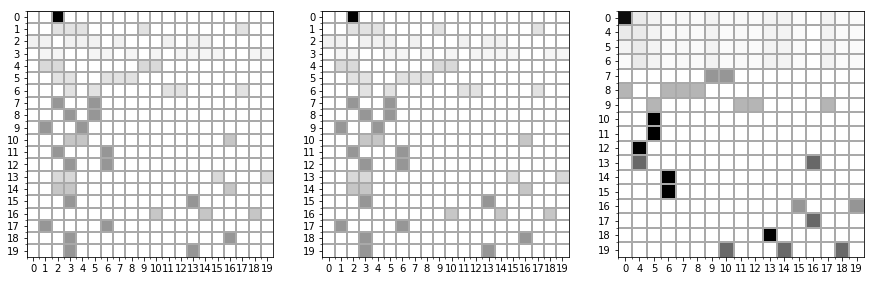

0.20036241107175767


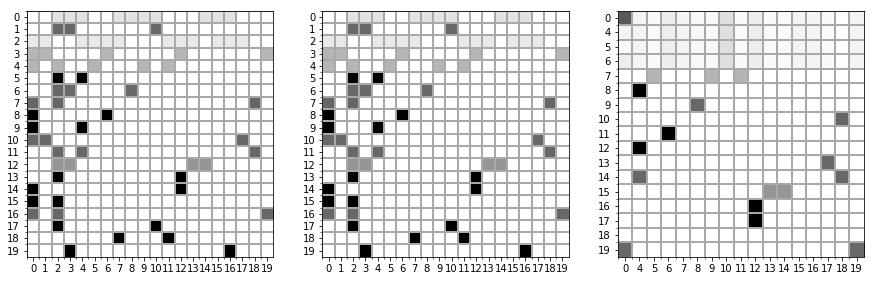

0.009519942752400201


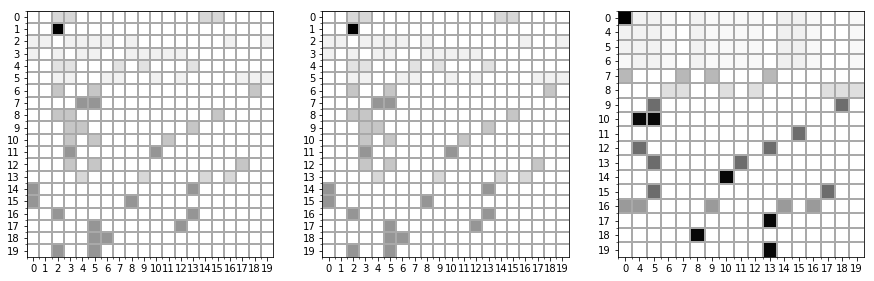

0.22696127823485535


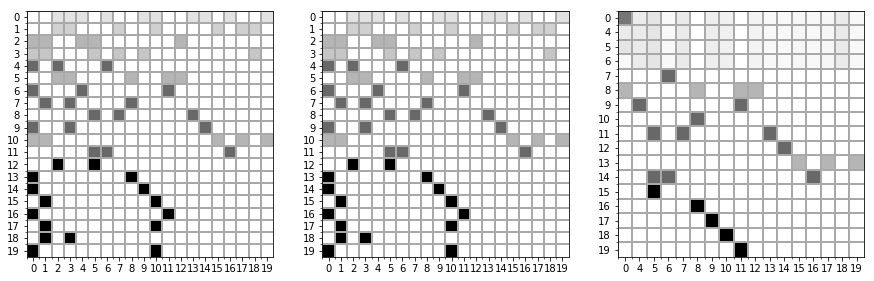

0.0816764391960203


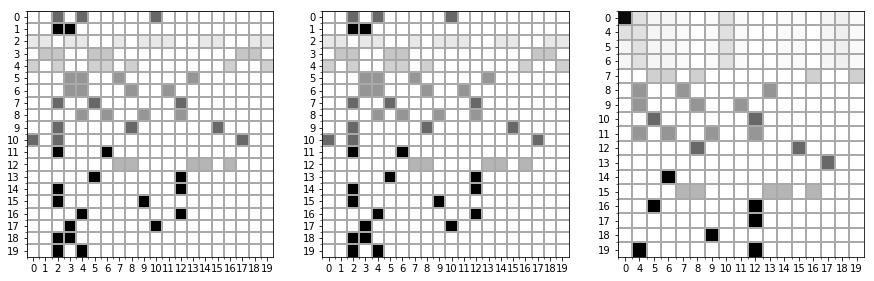

0.21015579378933325


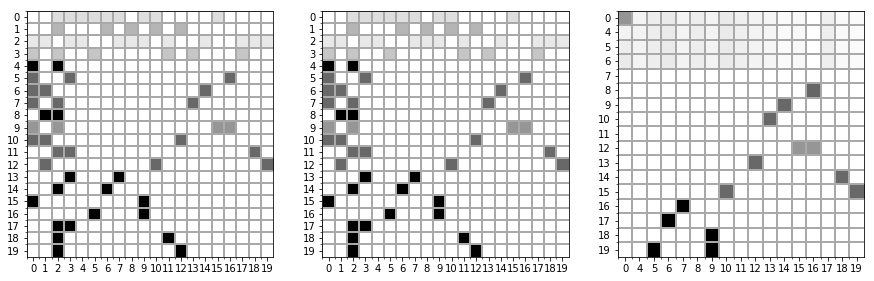

0.00482412826277967


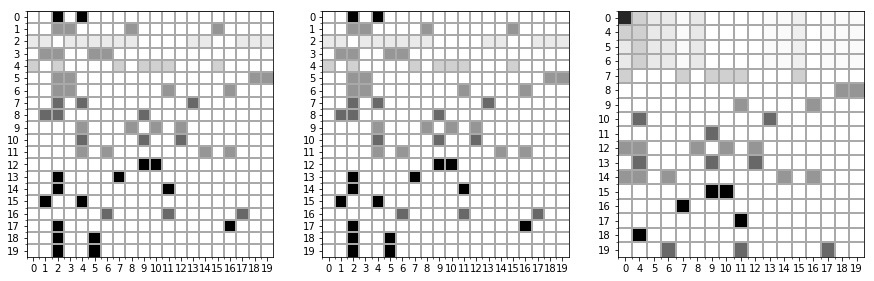

0.08369724820651392


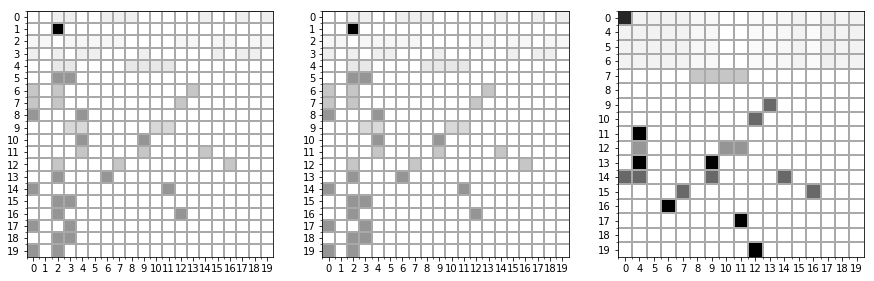

0.02435728417509786


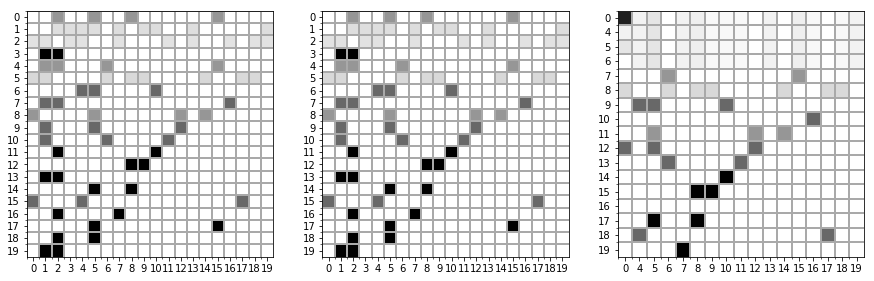

0.011973449699816285


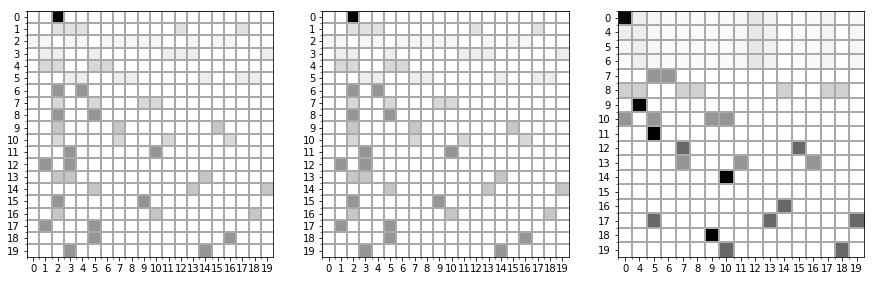

0.11276469938165423


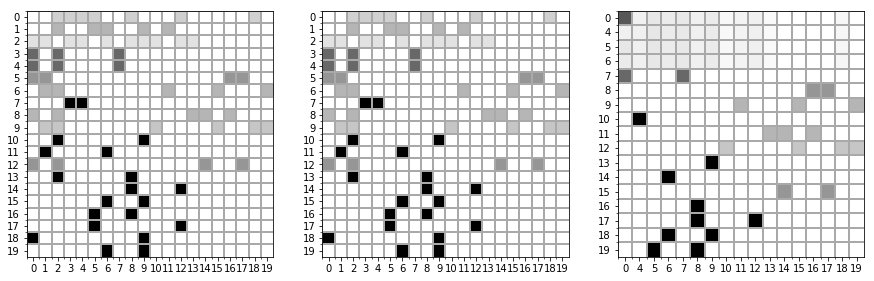

0.03324714074536406


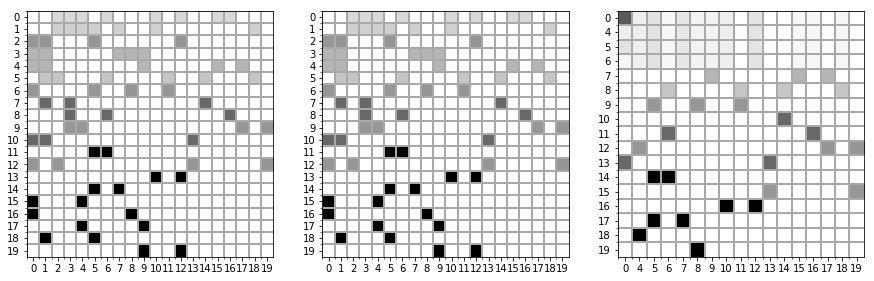

0.04987461395946857


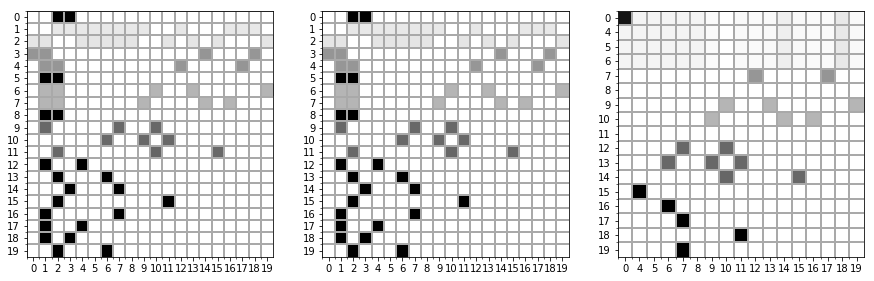

0.04703311614178807


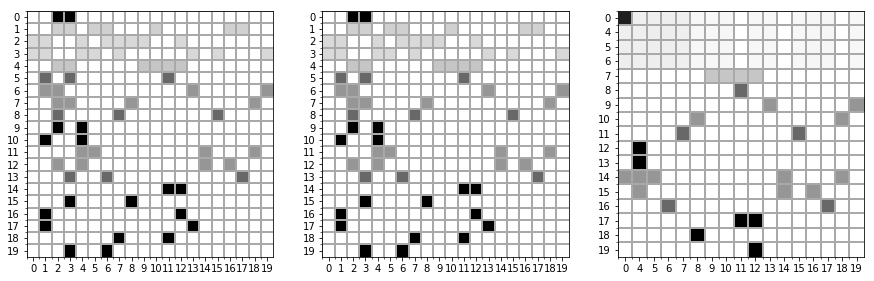

0.020479476585928413


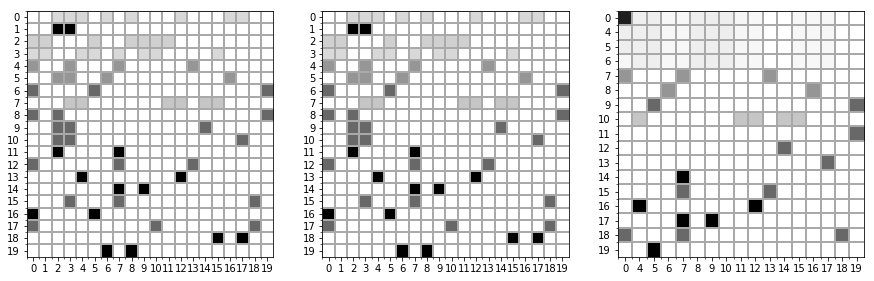

0.0012747323424140422


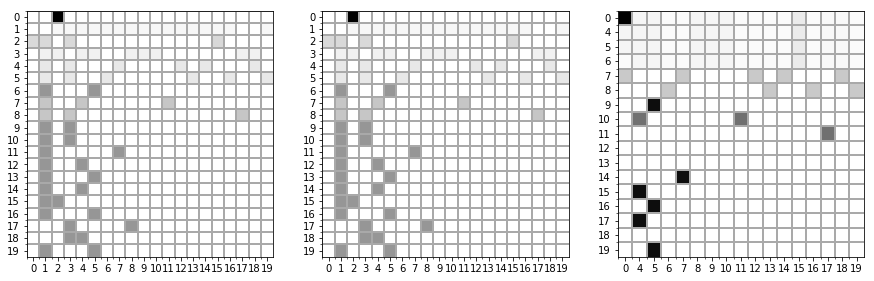

0.009804679458766508


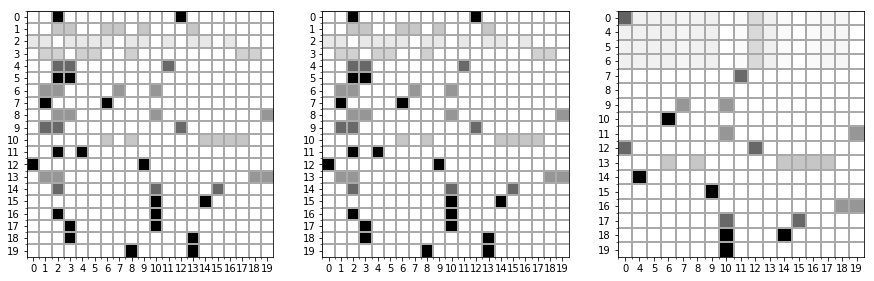

0.031228403911931935


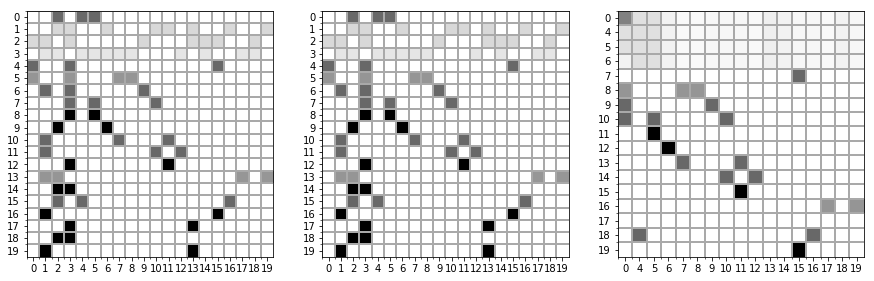

0.06586289140281743


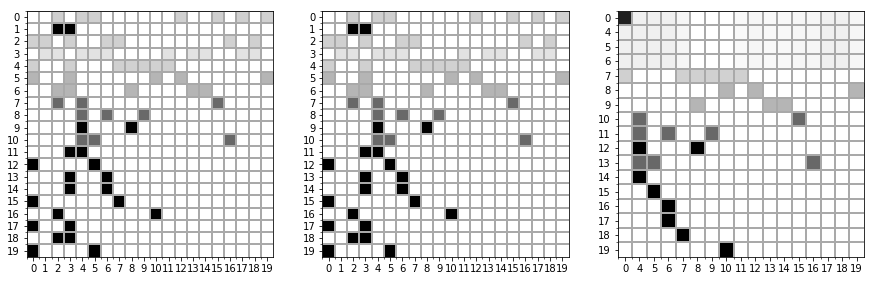

0.03915905589226787


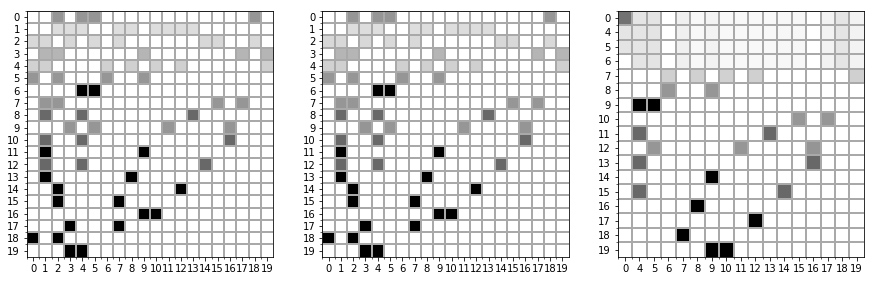

0.04094557656761966


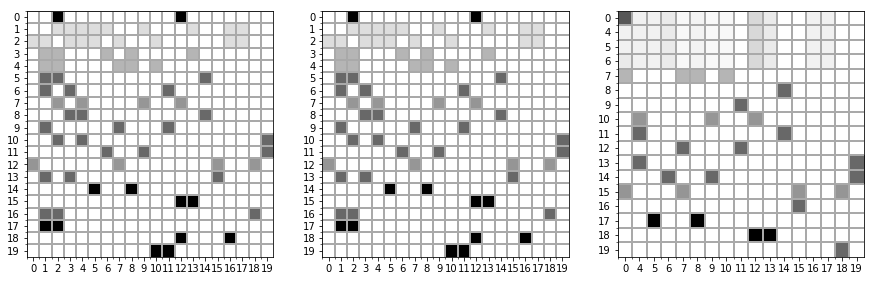

0.15425522000114178


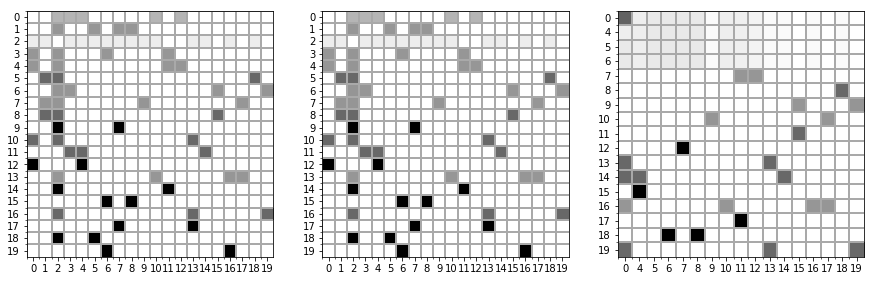

0.03937931870575673


KeyboardInterrupt: 

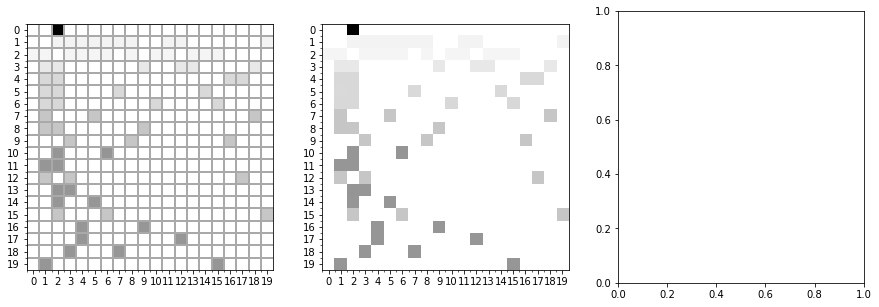

In [1040]:
for numb in range(5000):
    N = 20
    probs = np.random.uniform(0,1,N)
    probs = probs/sum(probs)
    G = nx.barabasi_albert_graph(N,2)
    current_mapping = dict(zip(list(range(N)), [[i] for i in range(N)]))
    macro_fracro = int(N/5)
    for i in range(macro_fracro):
        current_mapping[i] = [0]
#     current_mapping[N-4] = [N-5]
    # current_mapping = dict(zip(list(range(N)), np.random.choice(list(range(N)), N, p=probs)))
    macro_dict = {}
    for i in current_mapping.keys():
        macro = current_mapping[i]
        if type(macro)==list:
            for m in macro:
                if m not in macro_dict.keys():
                    macro_dict[m] = [i]
                else:
                    macro_dict[m].append(i)
        else:
            if macro not in macro_dict.keys():
                macro_dict[macro] = [i]
            else:
                macro_dict[macro].append(i)

    macro_size = len(macro_dict)

    G = check_network(G)
    A = nx.to_numpy_array(G)
    W_out_micro = get_Wout_full(G, p0)
    micro_size = len(W_out_micro)
    W_out_macro = np.zeros((micro_size,micro_size))

    for row in macro_dict.keys():
        W_out_macro[macro_dict[row]] = np.mean(W_out_micro[macro_dict[row]], axis=0)
        # now is a macro x micro size matrix
    macro_dict_keys = list(macro_dict.keys())
    W_out = np.zeros((macro_size,macro_size))
    for row in range(len(macro_dict.keys())):
        join_yes = macro_dict[macro_dict_keys[row]]
        join_not = np.array(list(set(list(current_mapping.keys())) - set(join_yes)))
        if len(join_yes)>1:
            macro_nodes_id = join_yes[0]
            macro_other_nodes = list(set(list(range(macro_size))) - set([macro_nodes_id]))
            other_nodes_id = list(set(current_mapping.keys()) - set(join_yes))
        for i in range(len(W_out_macro[row])):
            if i in join_yes:
                W_out[row][macro_nodes_id] += W_out_macro[row][i]
        W_out[row][macro_other_nodes] += W_out_macro[row][other_nodes_id]

    ordering = []
    for i in macro_dict.keys():
        for j in macro_dict[i]:
            ordering.append(j)
    test = np.zeros(W_out_micro.shape)
    for i in range(test.shape[0]):
        test[i]=W_out_micro[i][ordering]

    h = 5
    sp = 3

    ei1 = get_ei(test, p0=0)
    ei2 = get_ei(W_out_micro, p0=0)
    ei3 = get_ei(W_out, p0=0)
    if ei3 > ei1 and ei3 > ei2:
        print(ei3-ei1)
        fig, (ax1, ax2, ax3) = plt.subplots(1,sp,figsize=(h*sp,h))
        ax1.imshow(W_out_micro, cmap='Greys')
        ax1.set_xticks(np.arange(0, W_out_micro.shape[0], 1));
        ax1.set_yticks(np.arange(0, W_out_micro.shape[0], 1));
        ax1.set_xticklabels(np.arange(0, W_out_micro.shape[0], 1));
        ax1.set_yticklabels(np.arange(0, W_out_micro.shape[0], 1));
        ax1.set_xticks(np.arange(-.5, W_out_micro.shape[0]-0.5, 1), minor=True);
        ax1.set_yticks(np.arange(-.5, W_out_micro.shape[0]-0.5, 1), minor=True);
        ax1.grid(which='minor', color='darkgrey', linestyle='-', linewidth=2)

        ax2.imshow(test, cmap='Greys')
        ax2.set_xticks(np.arange(0, test.shape[0], 1));
        ax2.set_yticks(np.arange(0, test.shape[0], 1));
        ax2.set_xticklabels(ordering);
        ax2.set_yticklabels(ordering);
        ax2.set_xticks(np.arange(-.5, test.shape[0]-0.5, 1), minor=True);
        ax2.set_yticks(np.arange(-.5, test.shape[0]-0.5, 1), minor=True);
        ax2.grid(which='minor', color='darkgrey', linestyle='-', linewidth=2)

        ax3.imshow(W_out, cmap='Greys')
        ax3.set_xticks(np.arange(0, W_out.shape[0], 1));
        ax3.set_yticks(np.arange(0, W_out.shape[0], 1));
        ax3.set_xticklabels(list(macro_dict.keys()));
        ax3.set_yticklabels(list(macro_dict.keys()));
        ax3.set_xticks(np.arange(-.5, W_out.shape[0]-0.5, 1), minor=True);
        ax3.set_yticks(np.arange(-.5, W_out.shape[0]-0.5, 1), minor=True);
        ax3.grid(which='minor', color='darkgrey', linestyle='-', linewidth=2)

        plt.show()

In [1037]:
W_out = np.zeros((macro_size,macro_size))
for row in range(len(macro_dict.keys())):
    join_yes = macro_dict[macro_dict_keys[row]]
    join_not = np.array(list(set(list(current_mapping.keys())) - set(join_yes)))
    if len(join_yes)>1:
        macro_nodes_id = join_yes[0]
        macro_other_nodes = list(set(list(range(macro_size))) - set([macro_nodes_id]))
        other_nodes_id = list(set(current_mapping.keys()) - set(join_yes))
    for i in range(len(W_out_macro[row])):
        if i in join_yes:
            W_out[row][macro_nodes_id] += W_out_macro[row][i]
    W_out[row][macro_other_nodes] += W_out_macro[row][other_nodes_id]
#       W_out[row][other_nodes_id] = W_out_macro[row][join_not]

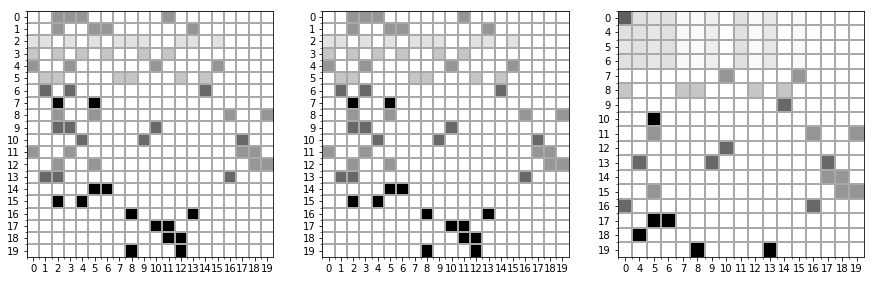

In [1038]:
fig, (ax1, ax2, ax3) = plt.subplots(1,sp,figsize=(h*sp,h))
ax1.imshow(W_out_micro, cmap='Greys')
ax1.set_xticks(np.arange(0, W_out_micro.shape[0], 1));
ax1.set_yticks(np.arange(0, W_out_micro.shape[0], 1));
ax1.set_xticklabels(np.arange(0, W_out_micro.shape[0], 1));
ax1.set_yticklabels(np.arange(0, W_out_micro.shape[0], 1));
ax1.set_xticks(np.arange(-.5, W_out_micro.shape[0]-0.5, 1), minor=True);
ax1.set_yticks(np.arange(-.5, W_out_micro.shape[0]-0.5, 1), minor=True);
ax1.grid(which='minor', color='darkgrey', linestyle='-', linewidth=2)

ax2.imshow(test, cmap='Greys')
ax2.set_xticks(np.arange(0, test.shape[0], 1));
ax2.set_yticks(np.arange(0, test.shape[0], 1));
ax2.set_xticklabels(ordering);
ax2.set_yticklabels(ordering);
ax2.set_xticks(np.arange(-.5, test.shape[0]-0.5, 1), minor=True);
ax2.set_yticks(np.arange(-.5, test.shape[0]-0.5, 1), minor=True);
ax2.grid(which='minor', color='darkgrey', linestyle='-', linewidth=2)

ax3.imshow(W_out, cmap='Greys')
ax3.set_xticks(np.arange(0, W_out.shape[0], 1));
ax3.set_yticks(np.arange(0, W_out.shape[0], 1));
ax3.set_xticklabels(list(macro_dict.keys()));
ax3.set_yticklabels(list(macro_dict.keys()));
ax3.set_xticks(np.arange(-.5, W_out.shape[0]-0.5, 1), minor=True);
ax3.set_yticks(np.arange(-.5, W_out.shape[0]-0.5, 1), minor=True);
ax3.grid(which='minor', color='darkgrey', linestyle='-', linewidth=2)

plt.show()

In [1170]:
list(range(1,2))

[1]

In [1226]:
p0 = 0.001
N = 20
m = 1
ns = [3,4,5,6,7,8]
ce = {}
for nm in ns:
    print(nm)
    n_macros = []
    causal_e = []
    for numb in range(10000):
#         G = nx.barabasi_albert_graph(N,m)
        G = nx.erdos_renyi_graph(N, 0.05)
        G = check_network(G)
        A = nx.to_numpy_array(G)
        W_out_micro = get_Wout_full(G, p0)

        macro_yes = list(set([N-i for i in range(1,nm)]))
        macro_not = list(set(list(current_mapping.keys()))-set(macro_yes))
        macro_slice_yes = W_out_micro[macro_yes]
        macro_slice_not = W_out_micro[macro_not]

        macro_slice = macro_slice_yes.sum(axis=0)
        macro_slice_ijs = macro_slice[macro_yes].sum(axis=0)
        macro_slice_out = list(macro_slice[macro_not])
        macro_slice_out.append(macro_slice_ijs)
        macro_slice_row = np.array(macro_slice_out)

        micro_slice_ijs = macro_slice_not.T[macro_yes].T
        micro_slice_out = list(macro_slice_not.T[macro_not])
        micro_slice_out.append(micro_slice_ijs.sum(axis=1))
        micro_slice_col = np.array(micro_slice_out).T
        
        if macro_slice_row.sum(axis=0) > 0:
            W_out = np.vstack((micro_slice_col, macro_slice_row/macro_slice_row.sum(axis=0)))
        else:
            break
            
        sp=2
        h=6
        ei_Macro = get_ei(W_out, p0)
        ei_Micro = get_ei(W_out_micro, p0)
        if ei_Macro > ei_Micro:
            n_macros.append(len(macro_yes))
            causal_e.append(ei_Macro-ei_Micro)
            if np.random.rand() < 0.01:
                print(ei_Macro-ei_Micro)
                fig, (ax1,ax2) = plt.subplots(1,sp,figsize=(h*sp,h))

                ax1.imshow(W_out_micro*2, cmap='Greys')
                ax1.set_xticks(np.arange(0, W_out_micro.shape[0], 1));
                ax1.set_yticks(np.arange(0, W_out_micro.shape[0], 1));
                ax1.set_xticklabels(np.arange(0, W_out_micro.shape[0], 1));
                ax1.set_yticklabels(np.arange(0, W_out_micro.shape[0], 1));
                ax1.set_xticks(np.arange(-.5, W_out_micro.shape[0]-0.5, 1), minor=True);
                ax1.set_yticks(np.arange(-.5, W_out_micro.shape[0]-0.5, 1), minor=True);
                ax1.grid(which='minor', color='darkgrey', linestyle='-', linewidth=2)
                ax1.set_title(get_ei(W_out_micro, p0))

                ax2.imshow(W_out*2, cmap='Greys')
                ax2.set_xticks(np.arange(0, W_out.shape[0], 1));
                ax2.set_yticks(np.arange(0, W_out.shape[0], 1));
                ax2.set_xticklabels(np.arange(0, W_out.shape[0], 1));
                ax2.set_yticklabels(np.arange(0, W_out.shape[0], 1));
                ax2.set_xticks(np.arange(-.5, W_out.shape[0]-0.5, 1), minor=True);
                ax2.set_yticks(np.arange(-.5, W_out.shape[0]-0.5, 1), minor=True);
                ax2.grid(which='minor', color='darkgrey', linestyle='-', linewidth=2)
                ax2.set_title(get_ei(W_out, p0))

                plt.show()
    ce[nm] = [n_macros, causal_e]

3
4
5
6
7
8


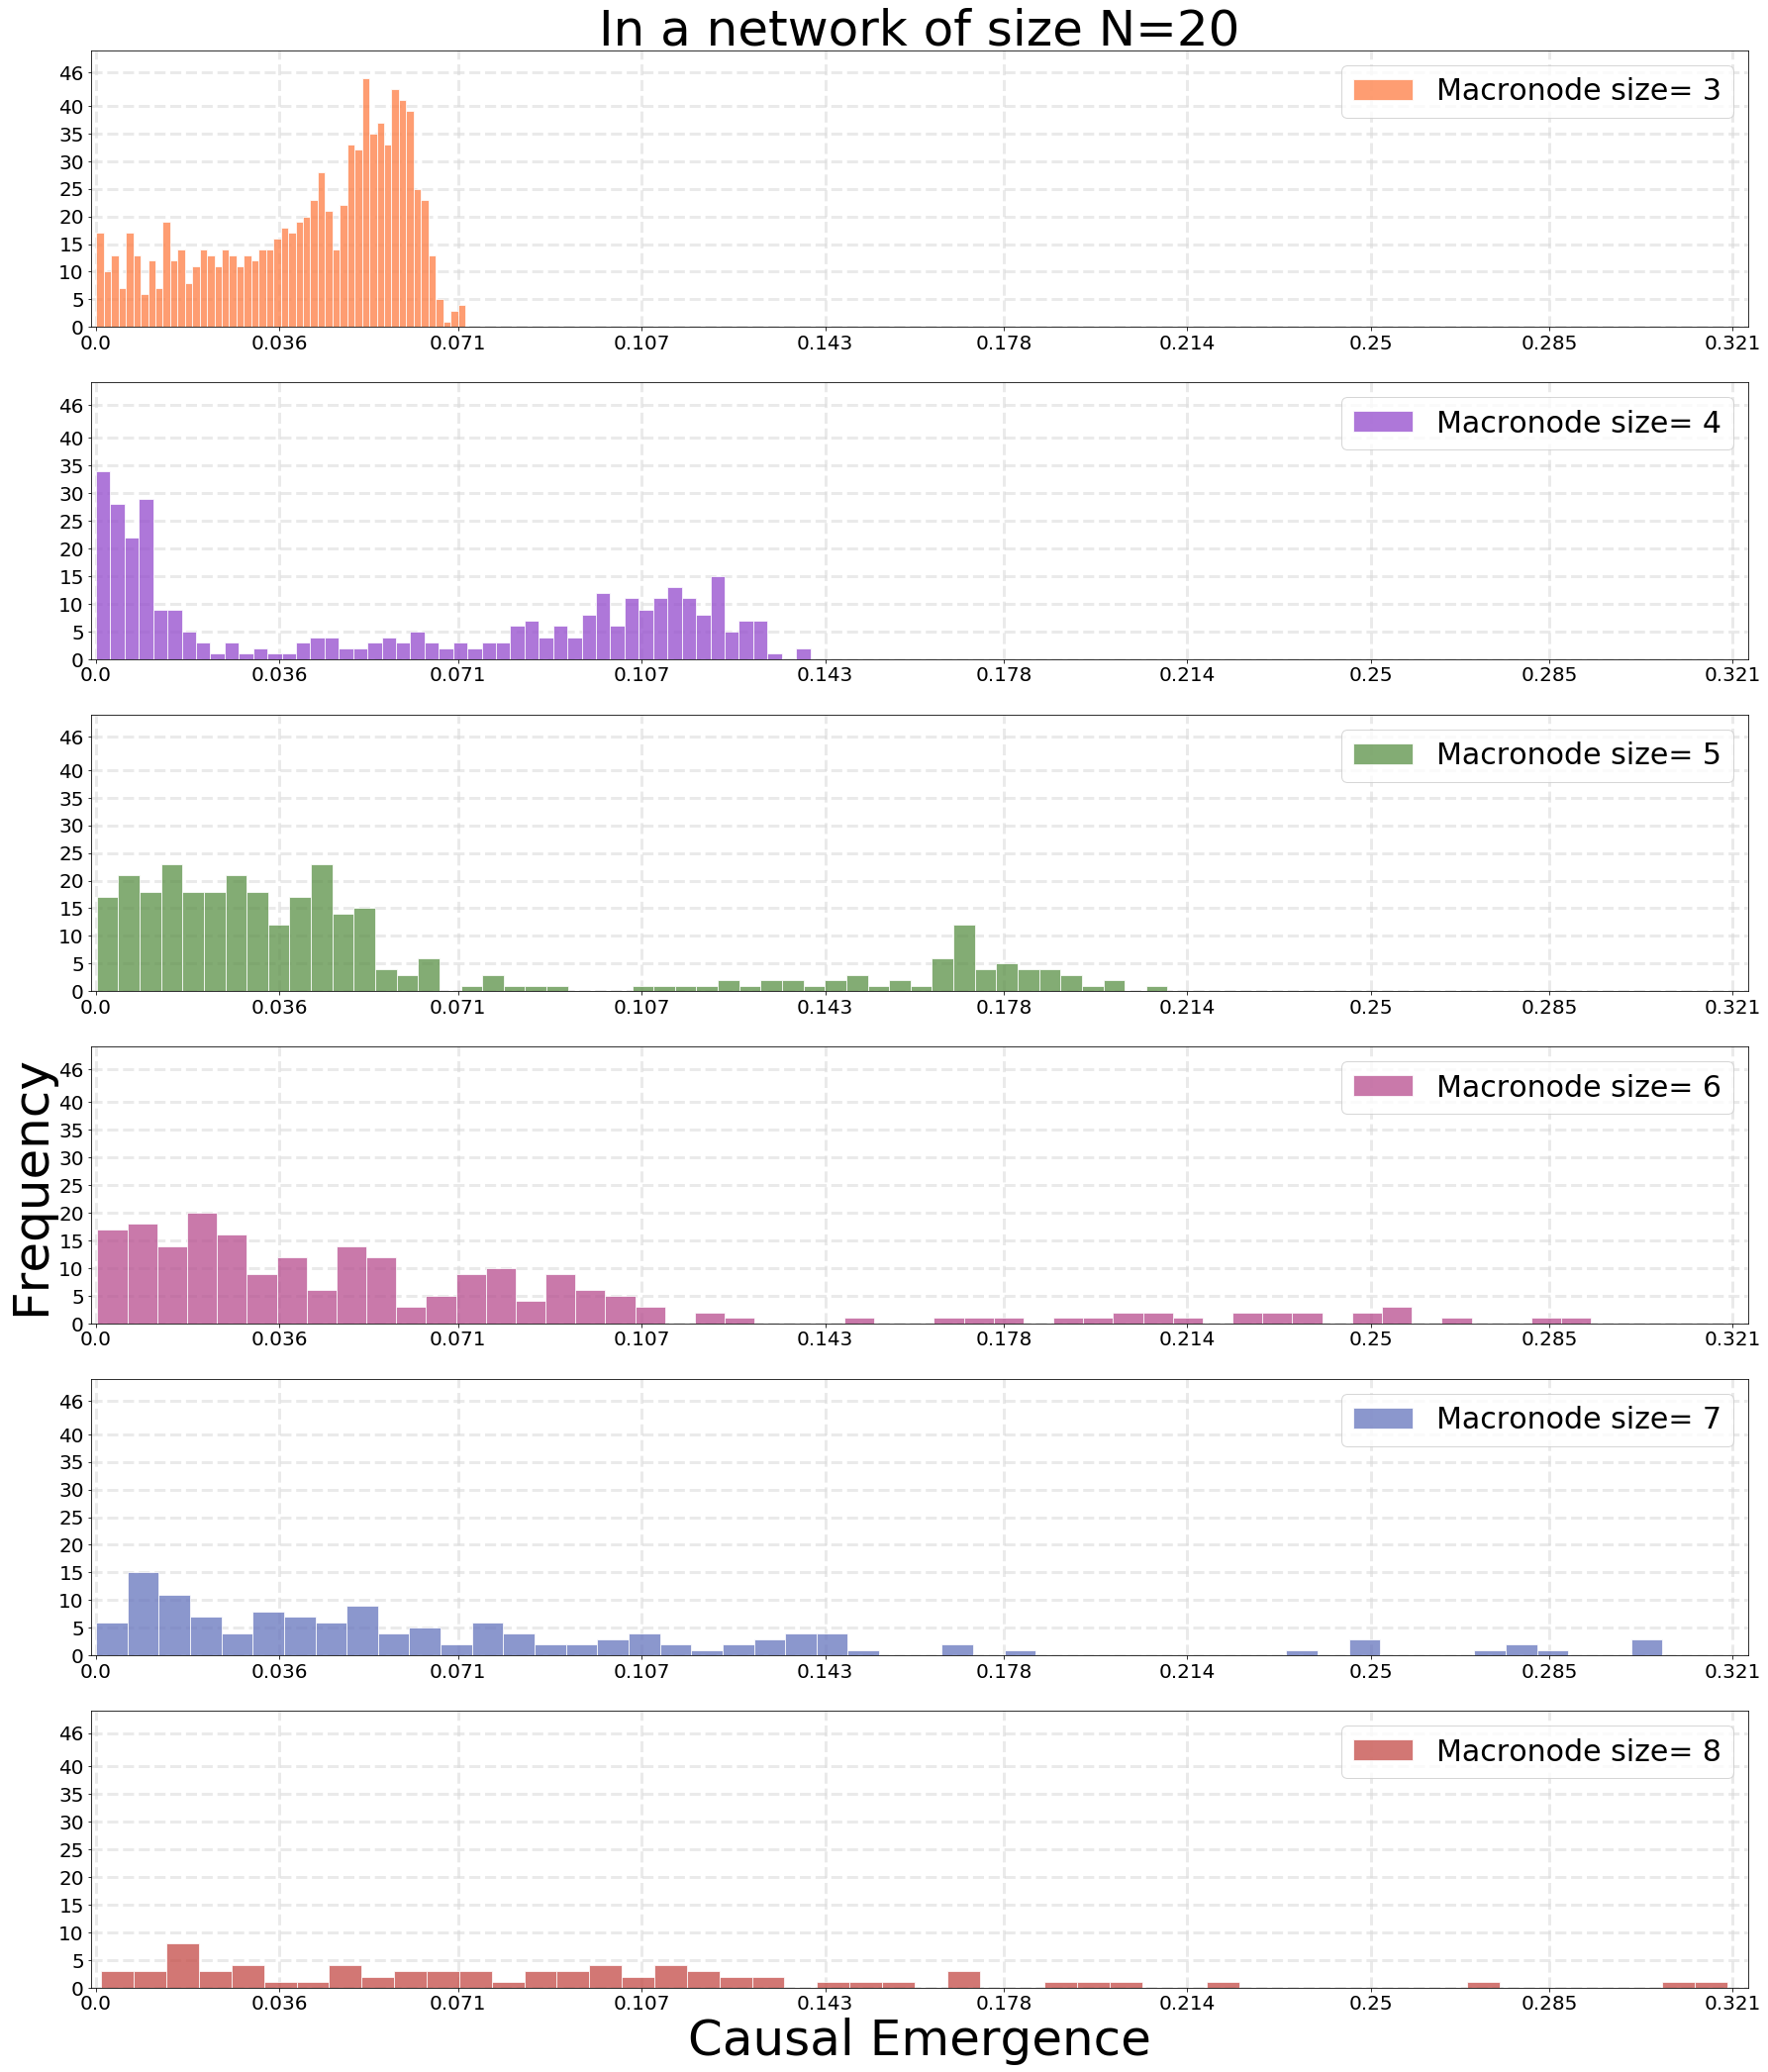

In [1224]:
cols = ["#fe7d43","#934acd","#5a9046","#b74c8e","#6574bd","#c44a45"]
fig, ax = plt.subplots(len(ns), 1, figsize=(5*len(ns),6*len(ns)))
for nm in range(len(ns)):
    ax[nm].hist(ce[ns[nm]][1], bins=50, color=cols[nm], edgecolor='w', linewidth=1.0,
                alpha=0.75, label="Macronode size= "+str(ns[nm]))
    ax[nm].legend(fontsize=30)
    ax[nm].set_yticks(np.linspace(0,46,10,dtype=int))
    ax[nm].set_xticks(np.round(np.linspace(0,0.321,10),3))
    ax[nm].set_yticklabels(np.linspace(0,46,10,dtype=int), fontsize=20)
    ax[nm].set_xticklabels(np.round(np.linspace(0,0.321,10),3), fontsize=20)
    ax[nm].set_xlim(-0.001,.324)
    ax[nm].set_ylim(0,50)
    ax[nm].set_axisbelow(True)
    ax[nm].grid(alpha=0.6, color='gainsboro', linestyle='--', linewidth=3.0)
ax[3].set_ylabel("Frequency", size=50)
ax[0].set_title("In a network of size N=20", size=50)
ax[nm].set_xlabel("Causal Emergence", size=50)

plt.savefig("figs/pngs/N20_causalEmergence.png", dpi=425, bbox_inches='tight')
plt.savefig("figs/pdfs/N20_causalEmergence.pdf", dpi=425, bbox_inches='tight')
plt.show()

In [451]:
def check_network(G):
    """
    Checks to make sure G is a directed networkx object.
    """
    if type(G)==np.ndarray:
        G = nx.from_numpy_matrix(G, create_using=nx.DiGraph())
    if type(G)==nx.classes.graph.Graph:
        G = nx.DiGraph(G)
    if nx.get_edge_attributes(G, 'weight')=={}:
        print("Alert: im gonna add some edgeweights to G")
        weights = {}
        for i in G.nodes():
            out_edges = list(G.out_edges(i))
            k = len(out_edges)
            for eij in out_edges:
                weights[eij] = 1./k
        nx.set_edge_attributes(G, weights, 'weight')

    return G

In [ ]:
def get_Wout_macro(G, current_mapping, p0=0.0):
    """
    Returns Wout based on the current macro mapping.
    """
    G = check_network(G)
    A = nx.to_numpy_array(G)
    A = A[~np.all(A == 0, axis=1)]
    
    Wout = A/A.sum(axis=1)[:,None]
    if Wout.shape[0] > 0:
        for i in range(Wout.shape[0]):
            temp = Wout[i] + np.random.uniform(0, p0, size=Wout[i].shape)
            Wout[i] = temp/temp.sum()

        return Wout
    else:
        return np.zeros((G.number_of_nodes(),G.number_of_nodes()))

    
    
    Wout

In [ ]:
def macronode2(G, current_mapping=[], p0=0.0):
    """
    Inputs: 
    - G: the original micro-scale network
    - current_mapping: a dictionary that maps each node onto its macronode
                       (if it is an empty list, each node is its own macro)
    - p0: small probability
    Output: 
    - Gm: macro network
    - new_mapping: micro to macro mapping
    """
    if current_mapping==[]:
        current_mapping = dict(zip(list(G.nodes()), [i for i in G.nodes()]))
    
    W_out_micro = get_Wout(G, p0)
    W_out_macro = 
    
    
    return Gm, new_mapping

In [473]:
current_mapping=[]
if current_mapping==[]:
    current_mapping = dict(zip(list(G.nodes()), [i for i in G.nodes()]))
# current_mapping

In [6]:
import scipy.io as sio
X = sio.loadmat('TPM_tests.mat')['figure_2']

NameError: name 'yy' is not defined

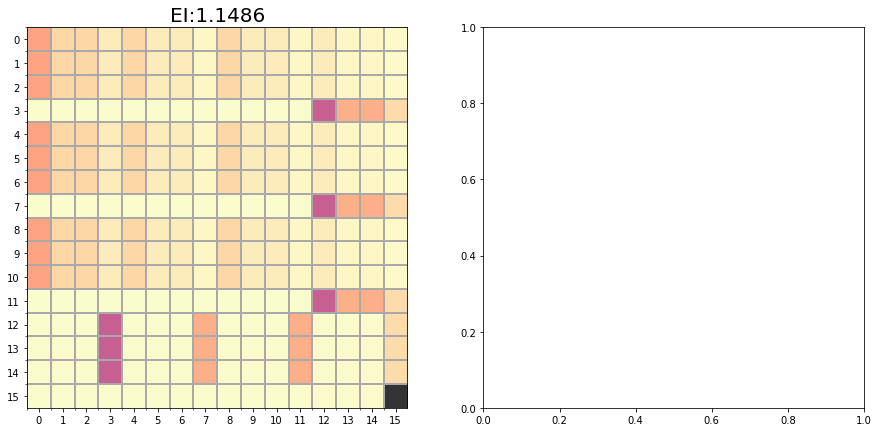

In [8]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15,7))

G = nx.from_numpy_array(X, create_using=nx.DiGraph())

ax0.imshow(X, cmap='magma_r', alpha=0.8)
ax0.set_xticks(np.arange(0, X.shape[0], 1));
ax0.set_yticks(np.arange(0, X.shape[0], 1));
ax0.set_xticklabels(np.arange(0, X.shape[0], 1));
ax0.set_yticklabels(np.arange(0, X.shape[0], 1));
ax0.set_xticks(np.arange(-.5, X.shape[0]-0.5, 1), minor=True);
ax0.set_yticks(np.arange(-.5, X.shape[0]-0.5, 1), minor=True);
ax0.grid(which='minor', color='darkgrey', linestyle='-', linewidth=2)
# ax0.xaxis.tick_top()
ax0.set_title("EI:%.4f"%get_ei_dd(X), size=20)

nodebunch = [0,1,2,4,5,6,8,9,10]
Gm = macronode(G, nodebunch=nodebunch)
nodebunch = [0,1,2]
Gm = macronode(Gm, nodebunch=nodebunch)
nodebunch = [0,1,2]
Gm = macronode(Gm, nodebunch=nodebunch)

WoutM = get_Wout_full(Gm)
WoutM[1] = np.array([0.0081, 1-sum(yy), (sum(yy)-0.0081)/2, (sum(yy)-0.0081)/2])
thresh = 0.1/(WoutM.shape[0]+1)
for i in range(WoutM.shape[0]):
    if len(WoutM[i][np.where(WoutM[i] > thresh)]) > 0:
        WoutM[i][np.where(WoutM[i]<thresh)[0]] = 0
    WoutM[i] = WoutM[i]/(sum(WoutM[i]))

Gm = prepare_network(WoutM)

ax1.imshow(WoutM, cmap='magma_r', alpha=0.8)
ax1.set_xticks(np.arange(0, WoutM.shape[0], 1));
ax1.set_yticks(np.arange(0, WoutM.shape[0], 1));
ax1.set_xticklabels(np.arange(0, WoutM.shape[0], 1));
ax1.set_yticklabels(np.arange(0, WoutM.shape[0], 1));
ax1.set_xticks(np.arange(-.5, WoutM.shape[0]-0.5, 1), minor=True);
ax1.set_yticks(np.arange(-.5, WoutM.shape[0]-0.5, 1), minor=True);
ax1.grid(which='minor', color='darkgrey', linestyle='-', linewidth=2)
# ax1.xaxis.tick_top()
ax1.set_title("EI:%.4f"%get_ei(Gm), size=20)



plt.show()

In [693]:
from scipy.stats import gaussian_kde

In [ ]:
S = nx.subgraph(G,nodebunch)
S_plus = []
for si in S.nodes():
    neigh = nx.neighbors(G, si)
    for nei in neigh:
        S_plus.append(nei)

S_outside = set(S_plus) - set(nodebunch)
S_inside = set(nodebunch)

mfpdict = {}
sfpdict = {}

for out in list(S_outside):
    for ins in list(set(S_plus)):
        if out!=ins:
            m = do_net(G, out, ins, n_sim=300)
            mfpdict[(out, ins)] = m
            
labs = np.array(list(mfpdict.keys()))
edges = list(mfpdict.keys())

plt.figure(figsize=(16,9))
for key in range((len(edges))):
    print(key)
    x = np.array([key]*len(mfpdict[edges[key]])) + \
        np.random.uniform(low=-0.11, high=0.11, size=len(mfpdict[edges[key]]))
    y = np.array(mfpdict[edges[key]]) + \
        np.random.uniform(low=-1.11, high=1.11, size=len(mfpdict[edges[key]]))
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]
    z = z/(max(z)+2*min(z))
    cols = plt.cm.gnuplot(z)
    sizes = np.array([300*z[i] if 300*z[i]<15 else 15 for i in range(len(z))])
    alphas = [sizes[i] for i in range(len(z))]/max(sizes)
    for i in range(len(x)):
        plt.plot(x[i], y[i], marker='o', color=cols[i], 
                 linestyle='', markersize=sizes[i], alpha=alphas[i])
    plt.plot(range((len(edges))), [np.mean(mfpdict[edges[key]]) for key in range((len(edges)))], 
             marker='s', markersize=15, color='k', alpha=0.5, markeredgewidth=2.5, 
             markeredgecolor='w', linestyle='')
plt.xticks(np.arange(len(labs)), labs, size=16)
plt.grid(True, linestyle='--', linewidth=2.0, alpha=0.65)
plt.yticks(size=16)
# plt.yscale('log')
plt.xlim(-1, 14)
plt.ylim(-20, 700)
plt.ylabel('First-Passage Time', size=20)
plt.xlabel('Edge', size=20)
# plt.savefig("figs/FirstPassageTime_dist.png", dpi=425, bbox_inches='tight')
# plt.savefig("figs/FirstPassageTime_dist.pdf", dpi=425, bbox_inches='tight')
plt.show()

In [154]:
def onion_decomp(G, weight=None):
    """
    INPUTS
    ------
    G: networkx graph

    OUTPUT
    ------
    node2coreness: dict, keys are nodes and values are coreness
    node2layer: dict, where keys are nodes and values are onion decomp layers
    """
    H = G.copy()
    node2degree = dict(H.degree(weight=weight))
    # Perform onion decomp of network
    node2coreness = {}
    node2layer = {}
    core_n = 1
    layer_n = 1
    while len(H) > 0:
        # Get current onion layer
        current_layer = [node for node in node2degree if node2degree[node] <= core_n]
        # Set layer and coreness for every node in layer
        for node in current_layer:
            node2coreness[node] = core_n
            node2layer[node] = layer_n
            for neighbor in H[node]:
                if weight is None:
                    node2degree[neighbor] -= 1
                else:
                    node2degree[neighbor] -= H[node][neighbor][weight]
            # Remove node from network and degrees dict
            H.remove_node(node)
            del node2degree[node]
        # Update layer_n and core_n
        layer_n += 1
        try: # min() breaks if node2degree.values() is empty at end of algorithm
            if min(node2degree.values()) >= (core_n + 1):
                core_n = min(node2degree.values())
        except ValueError:
            pass

    return node2coreness,node2layer

## 5.2.0 Bipartite Structure

In [4]:
def make_bipartite(N_left_side, N_right_side, N_lattice=2, conn="across"):

    left_side = range(N_left_side)
    right_side = range(N_left_side, (N_left_side+N_right_side))
    G = nx.Graph()
    G.add_nodes_from(left_side)
    G.add_nodes_from(right_side)
    attrs = {}
    color = {}
    for i in left_side:
        attrs[i] = 'left'
        color[i] = 'white'
    for i in right_side:
        attrs[i] = 'right'
        color[i] = 'dodgerblue'
    nx.set_node_attributes(G, attrs, 'side')
    nx.set_node_attributes(G, color, 'color')
    
    if conn=='across' or conn=='both':
        for i in range(len(left_side)):
            G.add_edge(left_side[i], right_side[i])
    
    if conn=='degen':
        for i in range(len(left_side)):
            G.add_edge(left_side[i], right_side[0])

    if N_lattice==0:
        return G
    
    lattice_nodes = list(range(N_lattice))
    backwards = len(lattice_nodes)
    for i in lattice_nodes:
        for j in lattice_nodes:
            if i!=j:
                G.add_edge(left_side[i], right_side[j])
    
    labels = dict(zip(list(G.nodes()), list(np.array(G.nodes(), dtype=str))))
    nx.set_node_attributes(G, labels, 'label')
    
    return G

In [5]:
def get_pos(G, N_left_side=3, N_right_side=3):
    
    left_side = range(N_left_side)
    right_side = range(N_left_side, (N_left_side+N_right_side))

    pos = {}
    y_range = [0, max([N_left_side, N_right_side])]
    x_range = [-0.5, 0.5]
    left_x  = np.linspace(x_range[0], x_range[0], num=N_left_side)
    right_x = np.linspace(x_range[1], x_range[1], num=N_right_side)
    left_y  = np.linspace(y_range[0], y_range[1], num=N_left_side)
    right_y = np.linspace(y_range[0], y_range[1], num=N_right_side)
    
    for i in left_side:
        pos[i] = np.array([left_x[i], left_y[i]])
        
    for i, r in enumerate(right_side):
        pos[r] = np.array([right_x[i], right_y[i]])
    
    return pos

In [12]:
N_left_side  = 5
N_right_side = 5
left_side = list(range(N_left_side))
right_side = list(range(N_left_side, (N_left_side+N_right_side)))
N_lattice = 3
G = make_bipartite(N_left_side, N_right_side, N_lattice, conn="across")
pos = get_pos(G, N_left_side, N_right_side)
node_colors = list(nx.get_node_attributes(G, 'color').values())
ns = 2000

########################################
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(18,9))

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=ns, 
                       linewidths=5, alpha=0.99, ax=ax0).set_edgecolor('lime')
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=ns, 
                       linewidths=5, alpha=0.99, ax=ax0).set_edgecolor('lime')
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=ns, 
                       linewidths=4, alpha=0.99, ax=ax0).set_edgecolor('k')
nx.draw_networkx_edges(G, pos, edge_color="grey",width=4.55, alpha=0.98, ax=ax0)
nx.draw_networkx_edges(G, pos, edge_color="black", width=1.55, alpha=0.8, ax=ax0)
title = "Original Network\nEffective Information: %.4f"%(np.round(get_ei(G),5))
ax0.set_title(title, size=26)
ax0.axis('off')
nx.draw_networkx_labels(G, pos, font_size=22, font_color='k', font_weight='bold', ax=ax0)

########################################
########################################

left_side = list(range(N_left_side))
right_side = list(range(N_left_side, (N_left_side+N_right_side)))
N_left_side  = 3
N_right_side = 3
N_lattice = 0
G = make_bipartite(N_left_side, N_right_side, N_lattice, conn="across")
pos = get_pos(G, N_left_side, N_right_side)
node_colors = list(nx.get_node_attributes(G, 'color').values())

pos[1] = np.array([-0.5,  2.25])
pos[4] = np.array([0.5,  2.25])
pos[0] = np.array([-0.5,  0.80])
pos[3] = np.array([0.5,  0.80])
########################################
nx.draw_networkx_nodes(G, pos, node_color=['w','w', 'dodgerblue','dodgerblue'], nodelist=[1,2,4,5], 
                       node_size=ns, linewidths=5, alpha=0.99, ax=ax1).set_edgecolor('lime')
nx.draw_networkx_nodes(G, pos, nodelist=[0,3], node_color=['w', 'dodgerblue'], node_size=8000, 
                       linewidths=5, alpha=0.95, ax=ax1).set_edgecolor('lime')
nx.draw_networkx_nodes(G, pos, node_color=['w','w', 'dodgerblue','dodgerblue'], nodelist=[1,2,4,5], 
                       node_size=ns, linewidths=4, alpha=0.99, ax=ax1).set_edgecolor('k')
nx.draw_networkx_nodes(G, pos, nodelist=[0,3], node_color=['w', 'dodgerblue'], node_size=8000, 
                       linewidths=4, alpha=0.95, ax=ax1).set_edgecolor('k')
nx.draw_networkx_edges(G, pos, edge_color="grey",width=4.55, alpha=0.98, ax=ax1)
nx.draw_networkx_edges(G, pos, edge_color="black", width=1.55, alpha=0.8, ax=ax1)
nx.draw_networkx_labels(G, pos, labels={2:4, 5:9, 4:8, 1:3, 0:"012", 3:"567"}, 
                        font_size=22, font_color='k', font_weight='bold', ax=ax1)
pos = get_pos(G, N_left_side, N_right_side)
nx.draw_networkx_nodes(G, pos, nodelist=[0,3], node_color='white', node_size=1, 
                       linewidths=3, alpha=0.00, ax=ax1).set_edgecolor('grey')
title = "Macroscale Network\nEffective Information: %.4f"%(np.round(get_ei(G),5))
ax1.set_title(title, size=26)
ax1.axis('off')

# plt.savefig("figs/CausalEmergence_Bipartite.png", dpi=425, bbox_inches='tight')
# plt.savefig("figs/CausalEmergence_Bipartite.pdf", dpi=425, bbox_inches='tight')
plt.show()

In [41]:
N_left_side  = 5
N_right_side = 5
left_side = list(range(N_left_side))
right_side = list(range(N_left_side, (N_left_side+N_right_side)))
N_lattice = 4
G = make_bipartite(N_left_side, N_right_side, N_lattice, conn="across")
pos = get_pos(G, N_left_side, N_right_side)
node_colors = list(nx.get_node_attributes(G, 'color').values())
ns = 2000

########################################
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(18,9))

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=ns, 
                       linewidths=5, alpha=0.99, ax=ax0).set_edgecolor('lime')
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=ns, 
                       linewidths=5, alpha=0.99, ax=ax0).set_edgecolor('lime')
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=ns, 
                       linewidths=4, alpha=0.99, ax=ax0).set_edgecolor('k')
nx.draw_networkx_edges(G, pos, edge_color="grey",width=4.55, alpha=0.98, ax=ax0)
nx.draw_networkx_edges(G, pos, edge_color="black", width=1.55, alpha=0.8, ax=ax0)
title = "Original Network\nEffective Information: %.4f"%(np.round(get_ei(G),5))
ax0.set_title(title, size=26)
ax0.axis('off')
nx.draw_networkx_labels(G, pos, font_size=22, font_color='k', font_weight='bold', ax=ax0)

########################################
########################################

left_side = list(range(N_left_side))
right_side = list(range(N_left_side, (N_left_side+N_right_side)))
N_left_side  = 2
N_right_side = 2
N_lattice = 0
G = make_bipartite(N_left_side, N_right_side, N_lattice, conn="across")
pos = get_pos(G, N_left_side, N_right_side)
node_colors = list(nx.get_node_attributes(G, 'color').values())

pos[1] = np.array([-0.5,  2.25])
pos[3] = np.array([0.5,  2.25])
pos[0] = np.array([-0.5,  0.90])
pos[2] = np.array([0.5,  0.90])
########################################
nx.draw_networkx_nodes(G, pos, node_color=['w','dodgerblue','w','dodgerblue'], nodelist=[1,3], 
                       node_size=ns, linewidths=5, alpha=0.99, ax=ax1).set_edgecolor('lime')
nx.draw_networkx_nodes(G, pos, nodelist=[0,2], node_color=['w', 'dodgerblue'], node_size=10000, 
                       linewidths=5, alpha=0.95, ax=ax1).set_edgecolor('lime')
nx.draw_networkx_nodes(G, pos, node_color=['w','dodgerblue','w','dodgerblue'], nodelist=[1,3], 
                       node_size=ns, linewidths=4, alpha=0.99, ax=ax1).set_edgecolor('k')
nx.draw_networkx_nodes(G, pos, nodelist=[0,2], node_color=['w', 'dodgerblue'], node_size=10000, 
                       linewidths=4, alpha=0.95, ax=ax1).set_edgecolor('k')
nx.draw_networkx_edges(G, pos, edge_color="grey",width=4.55, alpha=0.98, ax=ax1)
nx.draw_networkx_edges(G, pos, edge_color="black", width=1.55, alpha=0.8, ax=ax1)
nx.draw_networkx_labels(G, pos, labels={1:4, 3:9, 0:"M1", 2:"M2"}, 
                        font_size=22, font_color='k', font_weight='bold', ax=ax1)
pos = get_pos(G, N_left_side, N_right_side)
nx.draw_networkx_nodes(G, pos, nodelist=[0,3], node_color='white', node_size=1, 
                       linewidths=3, alpha=0.00, ax=ax1).set_edgecolor('grey')
title = "Macroscale Network\nEffective Information: %.4f"%(np.round(get_ei(G),5))
ax1.set_title(title, size=26)
ax1.axis('off')

# plt.savefig("figs/CausalEmergence_Bipartite1.png", dpi=425, bbox_inches='tight')
# plt.savefig("figs/CausalEmergence_Bipartite1.pdf", dpi=425, bbox_inches='tight')
plt.show()

In [98]:
left_side = list(range(N_left_side))
right_side = list(range(N_left_side, (N_left_side+N_right_side)))
N_left_side  = 5
N_right_side = 5
N_lattice = 5
G = make_bipartite(N_left_side, N_right_side, N_lattice, conn="across")
pos = get_pos(G, N_left_side, N_right_side)
node_colors = list(nx.get_node_attributes(G, 'color').values())
ns  = 700

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20,9))

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=ns, 
                       linewidths=3, alpha=0.95, ax=ax0).set_edgecolor('grey')
nx.draw_networkx_edges(G, pos, edge_color="gainsboro",width=4.55, alpha=0.98, ax=ax0)
nx.draw_networkx_edges(G, pos, edge_color="black", width=1.55, alpha=0.8, ax=ax0)
title = "Original Network\nEffective Information: %.2f"%(np.round(get_ei(G),5))
ax0.set_title(title, size=23)
ax0.axis('off')
nx.draw_networkx_labels(G, pos, font_size=18, font_color='w', font_weight='bold', ax=ax0)

######################

G = nx.DiGraph()
G.add_edge(0, 5)
G.add_edge(1, 5)
G.add_edge(2, 5)
G.add_edge(3, 5)
G.add_edge(4, 5)
G.add_node(6)
G.add_node(7)
G.add_node(8)
G.add_node(9)
N_left_side  = 5
N_right_side = 5
left_nodes = list(range(N_left_side))
pos = get_pos(G, N_left_side, N_right_side)

nx.draw_networkx_nodes(G, pos, node_color='blue', node_size=ns, 
                       linewidths=3, alpha=0.95, ax=ax1).set_edgecolor('grey')
nx.draw_networkx_nodes(G, pos, nodelist=left_nodes, node_color='red', node_size=ns, 
                       linewidths=3, alpha=0.95, ax=ax1).set_edgecolor('grey')

nx.draw_networkx_edges(G, pos, edge_color="gainsboro",width=4.55, alpha=0.98, ax=ax1)
nx.draw_networkx_edges(G, pos, edge_color="black", width=1.55, alpha=0.8, ax=ax1)
title = "Fan Network\nEffective Information: %.2f"%(np.round(get_ei(G),5))
ax1.set_title(title, size=23)
ax1.axis('off')
nx.draw_networkx_labels(G, pos, font_size=18, font_color='w', font_weight='bold', ax=ax1)

# plt.savefig("figs/Macronode_Bipartite2.png", dpi=425, bbox_inches='tight')
# plt.savefig("figs/Macronode_Bipartite2.pdf", dpi=425, bbox_inches='tight')
plt.show()

In [94]:
G = nx.Graph()
G.add_edge(0, 8)
G.add_edge(1, 8)
G.add_edge(2, 8)
G.add_edge(2, 9)
G.add_edge(3, 9)
G.add_edge(4, 9)
G.add_edge(5, 9)
G.add_edge(6, 9)
G.add_edge(7, 9)
N_left_side  = 8
N_right_side = 2
left_nodes = list(range(N_left_side))
pos = get_pos(G, N_left_side, N_right_side)
node_colors = list(nx.get_node_attributes(G, 'color').values())
ns = 1000

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20,9))

nx.draw_networkx_nodes(G, pos, node_color='blue', node_size=ns, 
                       linewidths=3, alpha=0.95, ax=ax0).set_edgecolor('grey')
nx.draw_networkx_nodes(G, pos, nodelist=left_nodes, node_color='red', node_size=ns, 
                       linewidths=3, alpha=0.95, ax=ax0).set_edgecolor('grey')
nx.draw_networkx_edges(G, pos, edge_color="gainsboro",width=4.55, alpha=0.98, ax=ax0)
nx.draw_networkx_edges(G, pos, edge_color="black", width=1.55, alpha=0.8, ax=ax0)
title = "Original Network\nEffective Information: %.2f"%(np.round(get_ei(G),5))
ax0.set_title(title, size=23)
ax0.axis('off')
nx.draw_networkx_labels(G, pos, font_size=18, font_color='w', font_weight='bold', ax=ax0)

G = nx.Graph()
G.add_edge(2, 4)
G.add_edge(1, 4)
G.add_edge(1, 3)
G.add_edge(0, 3)
N_left_side  = 3
N_right_side = 2
left_nodes = list(range(N_left_side))
pos = get_pos(G, N_left_side, N_right_side)
node_colors = list(nx.get_node_attributes(G, 'color').values())

nx.draw_networkx_nodes(G, pos, node_color='blue', node_size=ns, 
                       linewidths=3, alpha=0.95, ax=ax1).set_edgecolor('grey')
nx.draw_networkx_nodes(G, pos, nodelist=left_nodes, node_color='red', node_size=ns, 
                       linewidths=3, alpha=0.95, ax=ax1).set_edgecolor('grey')
nx.draw_networkx_nodes(G, pos, nodelist=[0,2], node_color='red', node_size=ns*4, 
                       linewidths=3, alpha=0.95, ax=ax1).set_edgecolor('grey')
nx.draw_networkx_edges(G, pos, edge_color="gainsboro",width=4.55, alpha=0.98, ax=ax1)
nx.draw_networkx_edges(G, pos, edge_color="black", width=1.55, alpha=0.8, ax=ax1)
title = "Original Network\nEffective Information: %.2f"%(np.round(get_ei(G),5))
ax1.set_title(title, size=23)
ax1.axis('off')
nx.draw_networkx_labels(G, pos, font_size=18, font_color='w', font_weight='bold', ax=ax1)

# plt.savefig("figs/Macronode_Bipartite3.png", dpi=425, bbox_inches='tight')
# plt.savefig("figs/Macronode_Bipartite3.pdf", dpi=425, bbox_inches='tight')
plt.show()

## End of Chapter 06.
_______________

### References:
- __[Anderson, P. W. (1972). More is different. Science,177(4047), 393–396. doi: 10.1126/science.177.4047.393](http://robotics.cs.tamu.edu/dshell/cs689/papers/anderson72more_is_different.pdf)__
- __[Bunge, M. (1963). A General Black Box Theory. Philosophy of Science, 30(4), 346–358. doi: 10.1086/287954](https://www.journals.uchicago.edu/doi/10.1086/287954)__
- __[Campbell, D. T. (1974). ‘Downward Causation’ in Hierarchically Organised Biological Systems. In *Studies in the philosophy of biology.* (pp. 179–186). doi: 10.1007/978-1-349-01892-5-11](https://link.springer.com/chapter/10.1007%2F978-1-349-01892-5_11)__
- __[Crutchfield, J. P. (1994). The Calculi of Emergence. Physica D, 75, 11–54. doi: 10.1016/0167-2789(94)90273-9](https://www.sciencedirect.com/science/article/pii/0167278994902739)__
- __[Fodor, J. A. (1974). Special Sciences (Or: The Disunity of Science as a Working Hypothesis). Synthese,28(2), 97–115. doi: 10.1007/BF00485230](https://www.jstor.org/stable/20114958)__
- __[Hoel, E. P. (2017). When the Map Is Better Than the Territory. Entropy, 19(5), 188. doi: 10.3390/e19050188](http://www.mdpi.com/1099-4300/19/5/188)__
- __[Hoel, E. P., Albantakis, L., & Tononi, G. (2013). Quantifying causal emergence shows that macro can beat micro. Proceedings of the National Academy of Sciences, 110(49), 19790–5. doi: 10.1073/pnas.1314922110](http://www.pnas.org/content/110/49/19790)__
- __[Kim, J. (2000). Mind in a physical world: An essay on the mind-body problem and mental causation. MITPress.](https://mitpress.mit.edu/books/mind-physical-world)__
- __[Shannon, C. E. (1948). A mathematical theory of communication. The Bell System Technical Journal, 27(July 1928), 379–423. doi: 10.1145/584091.584093](http://math.harvard.edu/~ctm/home/text/others/shannon/entropy/entropy.pdf)__
- __[Sperry, R. W. (1969). A modified concept of consciousness. Psychological Review, 76(6), 532–536. doi: 10.1037/h0028156](http://www.informationphilosopher.com/solutions/scientists/sperry/Sperry_Modified_Consciousness.pdf)__
- __[Wolpert, D. H., Grochow, J. A., Libby, E., & DeDeo, S. (2014). Optimal high-level descriptions of dynamical systems. arXiv, 1–33.](https://arxiv.org/abs/1409.7403)__